# Module 2 - Technique Practice

In [1]:
# Import Necessary Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.linear_model import Ridge
import xgboost as xgb

# data location
data_url = 'C:/Users/Shivi Jain/OneDrive/Desktop/Data Mining/Module 1/data.csv'

# Read the given CSV file
a_df = pd.read_csv(data_url, sep= ';')

#View few records of the dataset
a_df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [2]:
# To display the Dataframe structure

print('\n Dataframe has', a_df.shape, 'rows and columns respectively')


 Dataframe has (4424, 37) rows and columns respectively


## Data Cleaning and Preperation

In [3]:
#check null values
a_df.isnull()

# Check for null values column by column
null_columns = a_df.columns[a_df.isnull().any()]
for column in null_columns:
    print(f"Column '{column}' has null values.")

In [4]:
# Calculate the percentage of 'null' data in each column
for column in a_df.columns:
    null_count = a_df[column].isnull().sum()
    total_count = len(a_df[column])
    percentage = (null_count / total_count) * 100
    print(f"Column '{column}': {percentage:.3f}% of null data.")

Column 'Marital status': 0.000% of null data.
Column 'Application mode': 0.000% of null data.
Column 'Application order': 0.000% of null data.
Column 'Course': 0.000% of null data.
Column 'Daytime/evening attendance	': 0.000% of null data.
Column 'Previous qualification': 0.000% of null data.
Column 'Previous qualification (grade)': 0.000% of null data.
Column 'Nacionality': 0.000% of null data.
Column 'Mother's qualification': 0.000% of null data.
Column 'Father's qualification': 0.000% of null data.
Column 'Mother's occupation': 0.000% of null data.
Column 'Father's occupation': 0.000% of null data.
Column 'Admission grade': 0.000% of null data.
Column 'Displaced': 0.000% of null data.
Column 'Educational special needs': 0.000% of null data.
Column 'Debtor': 0.000% of null data.
Column 'Tuition fees up to date': 0.000% of null data.
Column 'Gender': 0.000% of null data.
Column 'Scholarship holder': 0.000% of null data.
Column 'Age at enrollment': 0.000% of null data.
Column 'Internat

In [5]:
#Drop unwanted columns:
a_df = a_df.drop(columns=['Application order','Application mode','Displaced','Curricular units 1st sem (credited)',
                         'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
                         'Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)',
                         'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
                         'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
                         'Curricular units 2nd sem (without evaluations)'])
a_df.head()

,Marital status,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,171,1,1,122.0,1,19,12,5,9,...,1,0,20,0,0.000000,0.000000,10.8,1.4,1.74,Dropout
1,1,9254,1,1,160.0,1,1,3,3,3,...,1,0,19,0,14.000000,13.666667,13.9,-0.3,0.79,Graduate
2,1,9070,1,1,122.0,1,37,37,9,9,...,1,0,19,0,0.000000,0.000000,10.8,1.4,1.74,Dropout
3,1,9773,1,1,122.0,1,38,37,5,3,...,0,0,20,0,13.428571,12.400000,9.4,-0.8,-3.12,Graduate
4,2,8014,0,1,100.0,1,37,38,9,9,...,0,0,45,0,12.333333,13.000000,13.9,-0.3,0.79,Graduate


In [6]:
#Rename the columns:
a_df = a_df.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'})

In [7]:
values = {1: 'single',
          2: 'married',
          3: 'widower',
          4: 'divorced',
          5: 'facto union',
          6: 'legally separated'}

a_df["Marital status"] = a_df["Marital status"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status  Course  Daytime/evening attendance  Previous qualification  \
0         single     171                           1                       1   
1         single    9254                           1                       1   
2         single    9070                           1                       1   
3         single    9773                           1                       1   
4        married    8014                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  Mother's occupation  Father's occupation  ...  

In [8]:
values= {33: 'Biofuel Production Technologies',
         171: 'Animation and Multimedia Design',
         8014: 'Social Service (evening attendance)',
         9003: 'Agronomy',
         9070: 'Communication Design',
         9085: 'Veterinary Nursing',
         9119: 'Informatics Engineering',
         9130: 'Equinculture',
         9147: 'Management',
         9238: 'Social Service',
         9254: 'Tourism',
         9500: 'Nursing',
         9556: 'Oral Hygiene',
         9670: 'Advertising and Marketing Management',
         9773: 'Journalism and Communication',
         9853: 'Basic Education',
         9991: 'Management (evening attendance)'}

a_df["Course"] = a_df["Course"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                 

In [9]:
values= {1 : 'Secondary education',
         2 : "Higher education - bachelor's degree",
         3 : 'Higher education - degree',
         4 : "Higher education - master's",
         5 : 'Higher education - doctorate',
         6 : 'Frequency of higher education',
         9 : '12th year of schooling - not completed',
         10 : '11th year of schooling - not completed',
         12 : 'Other - 11th year of schooling',
         14 : '10th year of schooling',
         15 : '10th year of schooling - not completed',
         19 : 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
         38 : 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
         39 : 'Technological specialization course',
         40 : 'Higher education - degree (1st cycle)',
         42 : 'Professional higher technical course',
         43 : 'Higher education - master (2nd cycle)'}

a_df["Previous qualification"] = a_df["Previous qualification"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                       

In [10]:
values= {1 : 'Portuguese',
         2 : 'German',
         6 : 'Spanish',
         11 : 'Italian',
         13 : 'Dutch',
         14 : 'English',
         17 : 'Lithuanian',
         21 : 'Angolan',
         22 : 'Cape Verdean',
         24 : 'Guinean',
         25 : 'Mozambican',
         26 : 'Santomean',
         32 : 'Turkish',
         41 : 'Brazilian',
         62 : 'Romanian',
         100 : 'Moldova (Republic of)',
         101 : 'Mexican',
         103 : 'Ukrainian',
         105 : 'Russian',
         108 : 'Cuban',
         109 : 'Colombian'}

a_df["Nacionality"] = a_df["Nacionality"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  Mother's qualification  \
0                           122.0  Portuguese                      19   
1                           160.0  Portuguese                       1   
2                           122.0  Portuguese                      37   
3                           

In [11]:
values= {1 : 'Secondary Education - 12th Year of Schooling or Eq.',
         2 : "Higher Education - Bachelor's Degree",
         3 : 'Higher Education - Degree',
         4 : "Higher Education - Master's", 
         5 : "Higher Education - Doctorate",
         6 : 'Frequency of Higher Education',
         9 : '12th Year of Schooling - Not Completed',
         10 : '11th Year of Schooling - Not Completed',
         11 : '7th Year (Old)',
         12 : 'Other - 11th Year of Schooling',
         14 : '10th Year of Schooling',
         18 : 'General commerce course',
         19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
         22 : 'Technical-professional course',
         26 : '7th year of schooling',
         27 : '2nd cycle of the general high school course',
         29 : '9th Year of Schooling - Not Completed',
         30 : '8th year of schooling',
         34 : 'Unknown',
         35 : "Can't read or write",
         36 : 'Can read without having a 4th year of schooling',
         37 : 'Basic education 1st cycle (4th/5th year) or equiv.',
         38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
         39 : 'Technological specialization course',
         40 : 'Higher education - degree (1st cycle)',
         41 : 'Specialized higher studies course',
         42 : 'Professional higher technical course',
         43 : 'Higher Education - Master (2nd cycle)',
         44 : 'Higher Education - Doctorate (3rd cycle)'}

a_df["Mother's qualification"] = a_df["Mother's qualification"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [12]:
values= {1 : 'Secondary Education - 12th Year of Schooling or Eq.',
         2 : "Higher Education - Bachelor's Degree",
         3 : 'Higher Education - Degree',
         4 : "Higher Education - Master's",
         5 : 'Higher Education - Doctorate',
         6 : 'Frequency of Higher Education',
         9 : '12th Year of Schooling - Not Completed',
         10 : '11th Year of Schooling - Not Completed',
         11 : '7th Year (Old)',
         12 : 'Other - 11th Year of Schooling',
         13 : '2nd year complementary high school course',
         14 : '10th Year of Schooling',
         18 : 'General commerce course',
         19 : 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
         20 : 'Complementary High School Course',
         22 : 'Technical-professional course',
         25 : 'Complementary High School Course - not concluded',
         26 : '7th year of schooling',
         27 : '2nd cycle of the general high school course',
         29 : '9th Year of Schooling - Not Completed',
         30 : '8th year of schooling',
         31 : 'General Course of Administration and Commerce',
         33 : 'Supplementary Accounting and Administration',
         34 : 'Unknown',
         35 : "Can't read or write",
         36 : 'Can read without having a 4th year of schooling',
         37 : 'Basic education 1st cycle (4th/5th year) or equiv.',
         38 : 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
         39 : 'Technological specialization course',
         40 : 'Higher education - degree (1st cycle)',
         41 : 'Specialized higher studies course',
         42 : 'Professional higher technical course',
         43 : 'Higher Education - Master (2nd cycle)',
         44 : 'Higher Education - Doctorate (3rd cycle)'}

a_df["Father's qualification"] = a_df["Father's qualification"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())


  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [13]:
values= {0: 'Student', 
         1: 'Representatives of the Legislative Power and Executive Bodies', 
         2: 'Intellectual and Scientific Specialists', 
         3: 'Intermediate Level Technicians', 
         4: 'Administrative staff', 
         5: 'Personal Services, Security and Safety Workers', 
         6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
         7: 'Skilled Workers in Industry, Construction and Craftsmen', 
         8: 'Installation and Machine Operators and Assembly Workers', 
         9: 'Unskilled Workers', 
         10: 'Armed Forces Professions', 
         90: 'Other Situation', 
         99: 'Unknown', 
         122: 'Health professionals', 
         123: 'teachers', 
         125: 'Specialists in ICT', 
         131: 'Intermediate level science and engineering technicians and professions', 
         132: 'Intermediate level Technicians and Health professionals', 
         134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
         141: 'Office workers, secretaries and data processing operators', 
         143: 'Data, accounting, statistical, financial services and registry-related operators', 
         144: 'Other administrative support staff', 
         151: 'personal service workers', 
         152: 'sellers', 
         153: 'Personal care workers', 
         171: 'Skilled construction workers except electricians', 
         173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans', 
         175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 
         191: 'Cleaning workers', 
         192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
         193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
         194: 'Meal preparation assistants'}

a_df["Mother's occupation"] = a_df["Mother's occupation"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [14]:
values= {0: 'Student', 
         1: 'Representatives of the Legislative Power and Executive Bodies', 
         2: 'Intellectual and Scientific Specialists', 
         3: 'Intermediate Level Technicians and Professions', 
         4: 'Administrative staff', 
         5: 'Personal Services, Security and Safety Workers/Sellers', 
         6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
         7: 'Skilled Workers in Industry, Construction and Craftsmen', 
         8: 'Installation and Machine Operators and Assembly Workers', 
         9: 'Unskilled Workers', 
         10: 'Armed Forces Professions', 
         90: 'Other Situation', 
         99: 'Unknown', 
         101: 'Armed Forces Officers', 
         102: 'Armed Forces Sergeants', 
         103: 'Other Armed Forces personnel', 
         112: 'Directors of administrative and commercial services', 
         114: 'Hotel, catering, trade and other services directors', 
         121: 'Specialists in the physical sciences, mathematics, engineering and related techniques', 
         122: 'Health professionals', 
         123: 'Teachers', 
         124: 'Specialists in finance, accounting, administrative organization, public and commercial relations', 
         131: 'Intermediate level science and engineering technicians and professions', 
         132: 'Intermediate level Technicians and Health professionals', 
         134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
         135: 'Information and communication technology technicians', 
         141: 'Office workers/secretaries and data processing operators', 
         143: 'Data, accounting, statistical, financial services and registry-related operators', 
         144: 'Other administrative support staff', 
         151: 'personal service workers', 
         152: 'sellers', 
         153: 'Personal care workers', 
         154: 'Protection and security services personnel', 
         161: 'Market-oriented farmers and skilled agricultural and animal production workers', 
         163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence', 
         171: 'Skilled construction workers except electricians', 
         172: 'Skilled workers in metallurgy, metalworking', 
         174: 'Skilled workers in electricity and electronics', 
         175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 
         181: 'Fixed plant and machine operators', 
         182: 'assembly workers', 
         183: 'Vehicle drivers and mobile equipment operators', 
         192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
         193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
         194: 'Meal preparation assistants', 
         195: 'Street vendors (except food) and street service providers'}

a_df["Father's occupation"] = a_df["Father's occupation"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [15]:
values = {1: 'male',
          0: 'female'}

a_df["Gender"] = a_df["Gender"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [16]:
#check the datatype of the columns
print(a_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital status                    4424 non-null   object 
 1   Course                            4424 non-null   object 
 2   Daytime/evening attendance        4424 non-null   int64  
 3   Previous qualification            4424 non-null   object 
 4   Previous qualification (grade)    4424 non-null   float64
 5   Nacionality                       4424 non-null   object 
 6   Mother's qualification            4424 non-null   object 
 7   Father's qualification            4424 non-null   object 
 8   Mother's occupation               4424 non-null   object 
 9   Father's occupation               4424 non-null   object 
 10  Admission grade                   4424 non-null   float64
 11  Educational special needs         4424 non-null   int64  
 12  Debtor

In [17]:
#Statistical Analysis
a_df.describe()

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.890823,132.613314,126.978119,0.011528,0.113698,0.880651,0.248418,23.265145,0.024864,10.640822,10.230206,11.566139,1.228029,0.001969
std,0.311897,13.188332,14.482001,0.106760,0.317480,0.324235,0.432144,7.587816,0.155729,4.843663,5.210808,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,0.000000,0.000000,1.000000,0.000000,19.000000,0.000000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,1.000000,140.000000,134.800000,0.000000,0.000000,1.000000,0.000000,25.000000,0.000000,13.400000,13.333333,13.900000,2.600000,1.790000
max,1.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,18.875000,18.571429,16.200000,3.700000,3.510000


In [18]:
#show the unique values in each column
for column in a_df.columns:
    unique_values = a_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Marital status':
['single' 'married' 'divorced' 'widower' 'facto union' 'legally separated']

Unique values in column 'Course':
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (evening attendance)'
 'Management (evening attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Basic Education'
 'Veterinary Nursing' 'Equinculture' 'Oral Hygiene' 'Management'
 'Agronomy' 'Biofuel Production Technologies' 'Informatics Engineering']

Unique values in column 'Daytime/evening attendance':
[1 0]

Unique values in column 'Previous qualification':
['Secondary education'
 'Basic education 3rd cycle (9th/10th/11th year) or equiv.'
 'Professional higher technical course'
 'Technological specialization course'
 '11th year of schooling - not completed' 'Higher education - degree'
 'Higher education - degree (1st cycle)'
 "Higher education - bachelor's degree" "Higher education - master

## Exploratory Data Analysis

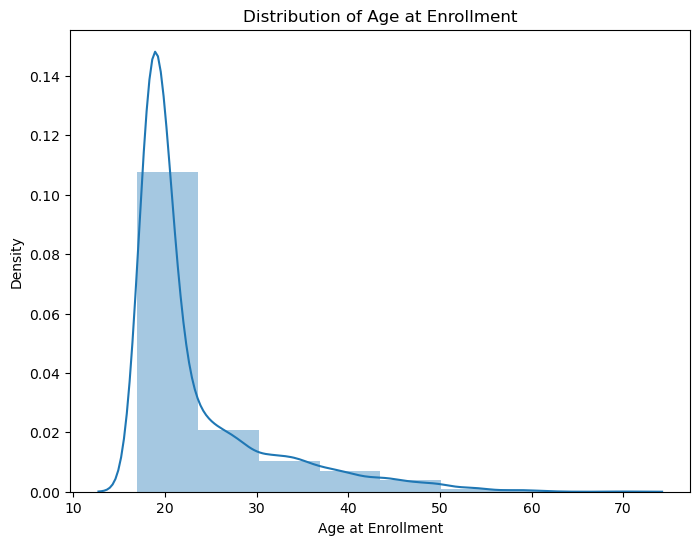

In [19]:
# Density and Histogram to see the distribution of Age

# Create a distribution plot
plt.figure(figsize=(8, 6))
sns.distplot(a_df['Age at enrollment'],bins=8)

# Customize the distribution plot
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Density')

# Display the Distribution plot for age
plt.show()

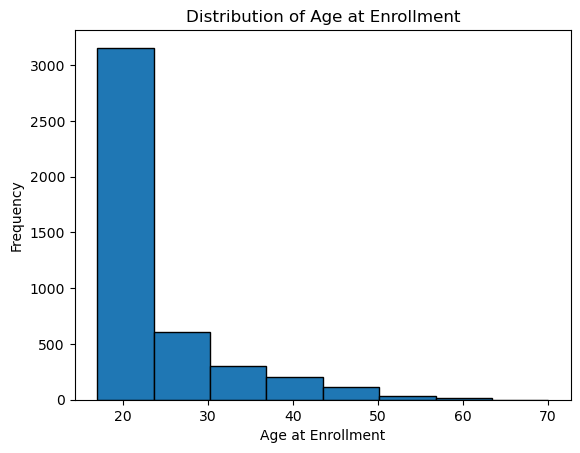

In [20]:
plt.hist(a_df['Age at enrollment'], bins=8, edgecolor='black')  # 'bins' defines the number of bins or intervals
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.title('Distribution of Age at Enrollment')
plt.show()

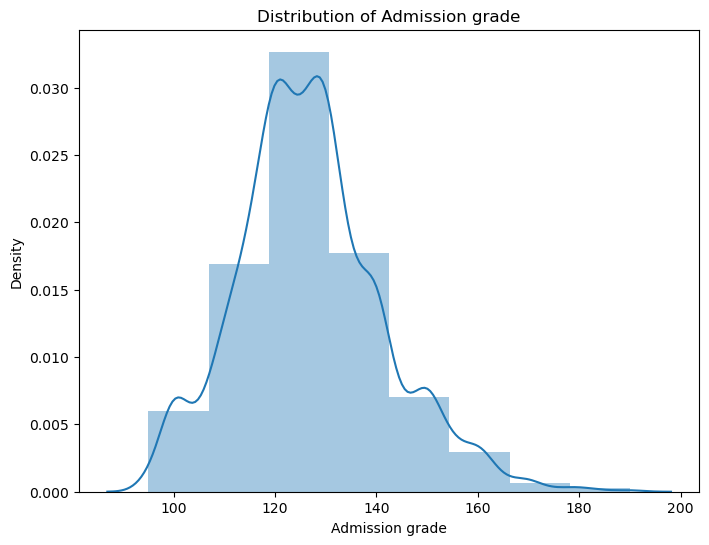

In [21]:
# Density and Histogram to see the distribution of Admission Grade

# Create a distribution plot
plt.figure(figsize=(8, 6))
sns.distplot(a_df['Admission grade'],bins=8)

# Customize the distribution plot
plt.title('Distribution of Admission grade')
plt.xlabel('Admission grade')
plt.ylabel('Density')

# Display the Distribution plot for age
plt.show()

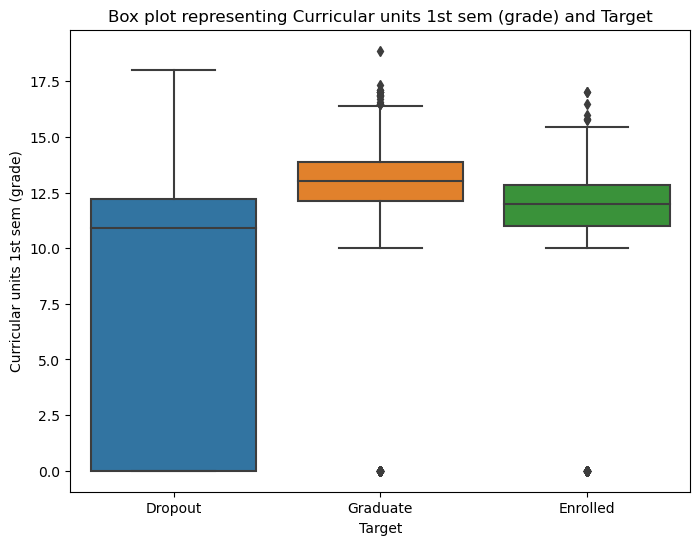

In [22]:
#Variation between target and 1st Term grade
plt.figure(figsize=(8, 6))
sns.boxplot(x=a_df['Target'],y=a_df['Curricular units 1st sem (grade)'])

# Customize the distribution plot
plt.title('Box plot representing Curricular units 1st sem (grade) and Target')
plt.xlabel('Target')
plt.ylabel('Curricular units 1st sem (grade)')

# Display the plot
plt.show()

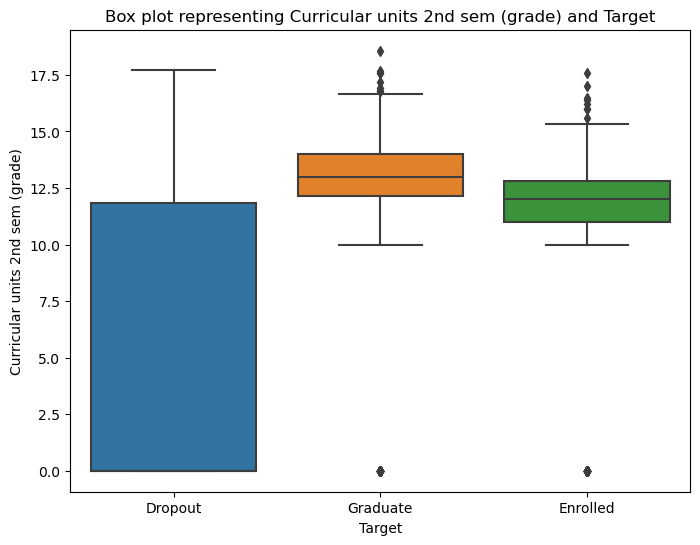

In [23]:
#Variation between target and 2nd sem grade
plt.figure(figsize=(8, 6))
sns.boxplot(x=a_df['Target'],y=a_df['Curricular units 2nd sem (grade)'])

# Customize the distribution plot
plt.title('Box plot representing Curricular units 2nd sem (grade) and Target')
plt.xlabel('Target')
plt.ylabel('Curricular units 2nd sem (grade)')

# Display the plot
plt.show()

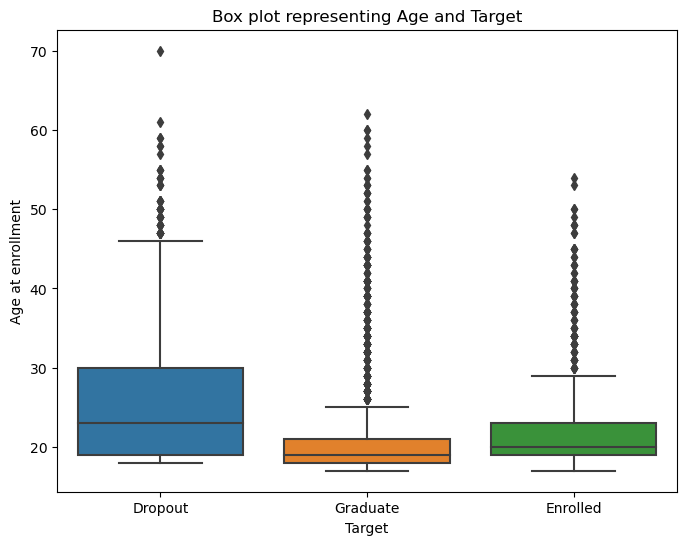

In [24]:
#Variation between age and target
plt.figure(figsize=(8, 6))
sns.boxplot(x=a_df['Target'],y=a_df['Age at enrollment'])

# Customize the distribution plot
plt.title('Box plot representing Age and Target')
plt.xlabel('Target')
plt.ylabel('Age at enrollment')

# Display the plot
plt.show()

<Figure size 800x600 with 0 Axes>

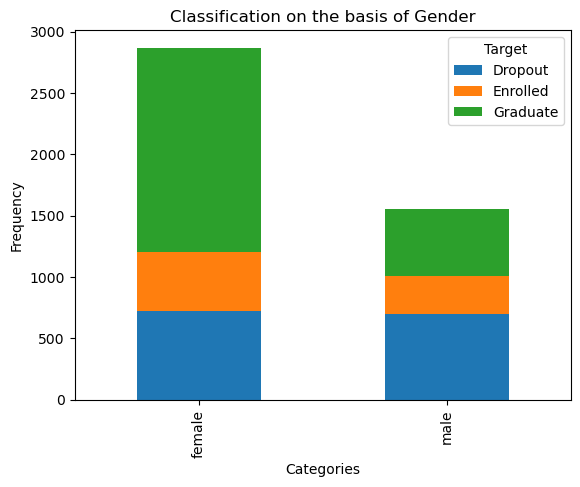

In [25]:
# Count the frequency of each category
category_counts = a_df.groupby(['Gender', 'Target']).size().unstack()

category_counts['Total'] = category_counts.sum(axis=1)
category_counts = category_counts.sort_values(by='Total', ascending=False).drop(columns='Total')


# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar',stacked ='True')

# Customize the chart
plt.title('Classification on the basis of Gender')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

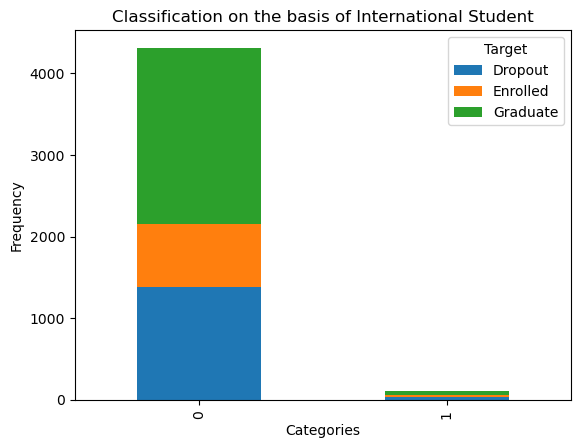

In [26]:
# Count the frequency of each category
category_counts = a_df.groupby(['International', 'Target']).size().unstack()

category_counts['Total'] = category_counts.sum(axis=1)
category_counts = category_counts.sort_values(by='Total', ascending=False).drop(columns='Total')


# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar',stacked ='True')

# Customize the chart
plt.title('Classification on the basis of International Student')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

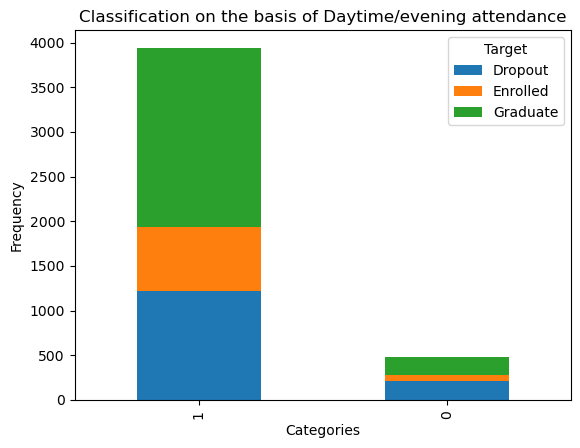

In [27]:
# Count the frequency of each category
category_counts = a_df.groupby(['Daytime/evening attendance', 'Target']).size().unstack()

category_counts['Total'] = category_counts.sum(axis=1)
category_counts = category_counts.sort_values(by='Total', ascending=False).drop(columns='Total')


# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar',stacked ='True')

# Customize the chart
plt.title('Classification on the basis of Daytime/evening attendance')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# Show the plot
plt.show()

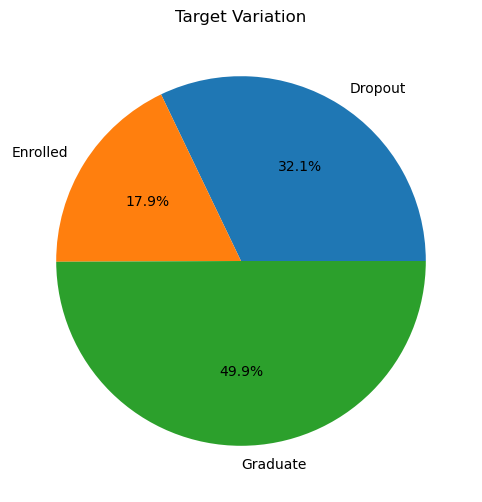

In [28]:
# Pie chart to see the variation in the target

#Checking the target variable
a_df.Target.value_counts(normalize=True)

# Group the DataFrame by 'target' and calculate the frequency
b_df = a_df.groupby('Target').size()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(b_df, labels=b_df.index, autopct='%1.1f%%')

# Customize the pie chart
plt.title('Target Variation')

# Show the pie chart
plt.show()

<Axes: xlabel='Target', ylabel='Marital status'>

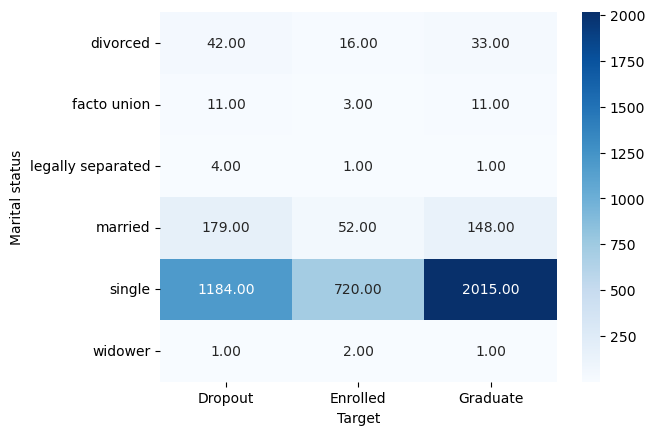

In [29]:
# Heat Map table to show the variation based on the Marital Status

table = pd.crosstab(a_df['Marital status'], a_df['Target'])
sns.heatmap(table, annot=True, fmt='.2f', cmap='Blues')

<Figure size 800x600 with 0 Axes>

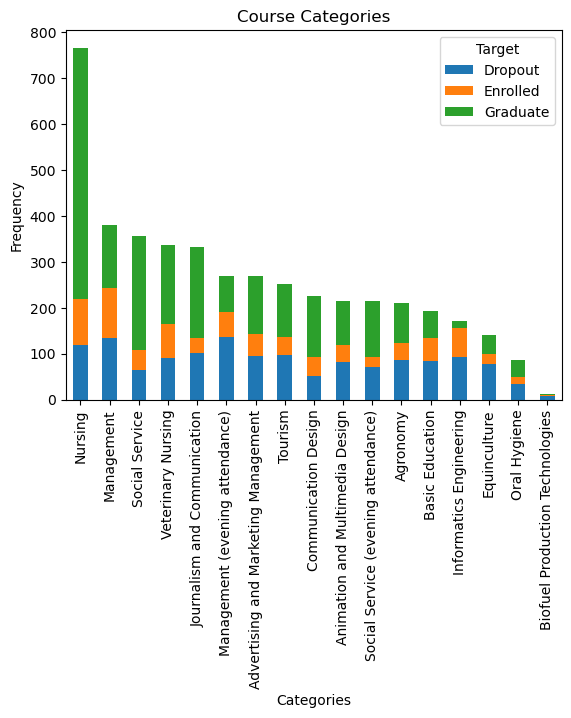

In [30]:
# Count the frequency of each category
category_counts = a_df.groupby(['Course', 'Target']).size().unstack()

category_counts['Total'] = category_counts.sum(axis=1)
category_counts = category_counts.sort_values(by='Total', ascending=False).drop(columns='Total')


# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar',stacked ='True')

# Customize the chart
plt.title('Course Categories')
plt.ylabel('Frequency')
plt.xlabel('Categories')

# Show the plot
plt.show()

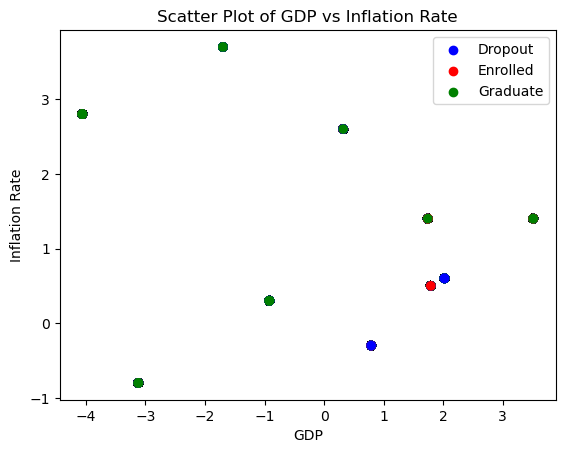

In [31]:
# Define colors for the target categories
colors = {'Dropout': 'blue', 'Enrolled': 'red', 'Graduate': 'green'}

# Create scatter plot
plt.scatter(a_df['GDP'], a_df['Inflation rate'], c=a_df['Target'].map(colors))

# Set labels and title
plt.xlabel('GDP')
plt.ylabel('Inflation Rate')
plt.title('Scatter Plot of GDP vs Inflation Rate')

# Add color legend
for target, color in colors.items():
    plt.scatter([], [], c=color, label=target)

plt.legend()

# Show the plot
plt.show()

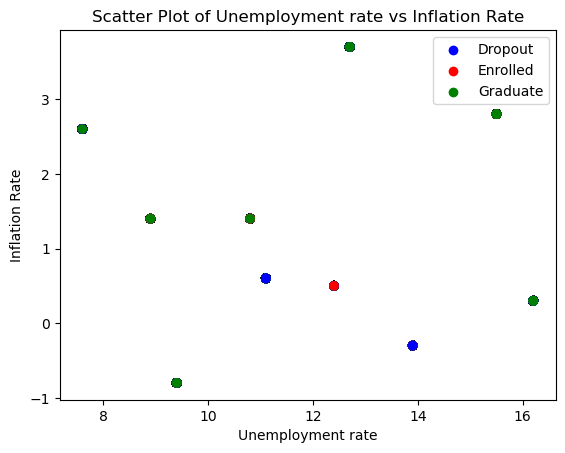

In [32]:
# Define colors for the target categories
colors = {'Dropout': 'blue', 'Enrolled': 'red', 'Graduate': 'green'}

# Create scatter plot
plt.scatter(a_df['Unemployment rate'], a_df['Inflation rate'], c=a_df['Target'].map(colors))

# Set labels and title
plt.xlabel('Unemployment rate')
plt.ylabel('Inflation Rate')
plt.title('Scatter Plot of Unemployment rate vs Inflation Rate')

# Add color legend
for target, color in colors.items():
    plt.scatter([], [], c=color, label=target)

plt.legend()

# Show the plot
plt.show()

## Feature Engineering

In [33]:
values= {'Secondary Education - 12th Year of Schooling or Eq.':'Secondary Education',
         "Higher Education - Bachelor's Degree": 'Graduate',
         'Higher Education - Degree': 'Graduate',
         "Higher Education - Master's":'Masters', 
         "Higher Education - Doctorate":'Masters',
         'Frequency of Higher Education':'Graduate',
         '12th Year of Schooling - Not Completed':'Secondary Education',
         '11th Year of Schooling - Not Completed':'Secondary Education',
         '7th Year (Old)':'Secondary Education',
         'Other - 11th Year of Schooling':'Secondary Education',
         '10th Year of Schooling':'Secondary Education',
         'General commerce course':'Secondary Education',
         'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.':'Secondary Education',
         'Technical-professional course':'Other',
         '7th year of schooling':'Secondary Education',
         '2nd cycle of the general high school course':'Secondary Education',
         '9th Year of Schooling - Not Completed':'Secondary Education',
         '8th year of schooling':'Secondary Education',
         'Unknown':'Other',
         "Can't read or write":'Other',
         'Can read without having a 4th year of schooling':'Other',
         'Basic education 1st cycle (4th/5th year) or equiv.':'Secondary Education',
         'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.':'Secondary Education',
         'Technological specialization course':'Other',
         'Higher education - degree (1st cycle)':'Graduate',
         'Specialized higher studies course':'Other',
         'Professional higher technical course':'Other',
         'Higher Education - Master (2nd cycle)': 'Masters',
         'Higher Education - Doctorate (3rd cycle)':'Masters'}

a_df["Mother's qualification Category"] = a_df["Mother's qualification"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [34]:
values= {'Secondary Education - 12th Year of Schooling or Eq.':'Secondary Education',
         '12th Year of Schooling - Not Completed':'Secondary Education',
         '11th Year of Schooling - Not Completed':'Secondary Education',
         '7th Year (Old)':'Secondary Education',
         'Other - 11th Year of Schooling':'Secondary Education',
         '2nd year complementary high school course':'Secondary Education',
         '10th Year of Schooling':'Secondary Education',
         'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.':'Secondary Education',
         'Complementary High School Course':'Secondary Education',
         'Technical-professional course':'Secondary Education',
         'Complementary High School Course - not concluded':'Secondary Education',
         '7th year of schooling':'Secondary Education',
         '2nd cycle of the general high school course':'Secondary Education',
         '9th Year of Schooling - Not Completed':'Secondary Education',
         '8th year of schooling':'Secondary Education',
         'Basic education 1st cycle (4th/5th year) or equiv.':'Secondary Education',
         'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.':'Secondary Education',
         "Higher Education - Bachelor's Degree": 'Graduate',
         'Higher Education - Degree': 'Graduate',
         "Higher Education - Master's": 'Masters',
         'Higher Education - Doctorate': 'Masters',
         'Frequency of Higher Education': 'Graduate',
         'Higher education - degree (1st cycle)': 'Graduate',
         'Higher Education - Master (2nd cycle)': 'Masters',
         'Higher Education - Doctorate (3rd cycle)': 'Masters',
         'General commerce course':'Other',
         'General Course of Administration and Commerce':'Other',
         'Supplementary Accounting and Administration':'Other',
         "Can't read or write":'Other',
         'Can read without having a 4th year of schooling':'Other',
         'Technological specialization course':'Other',
         'Specialized higher studies course':'Other',
         'Professional higher technical course':'Other',
         'Unknown':'Other'}

a_df["Father's qualification Category"] = a_df["Father's qualification"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [35]:
values= {'Secondary education':'Secondary Education',
         "Higher education - bachelor's degree":'Graduate',
         'Higher education - degree':'Graduate',
         "Higher education - master's":'Masters',
         'Higher education - doctorate':'Masters',
         'Frequency of higher education':'Graduate',
         '12th year of schooling - not completed':'Secondary Education',
         '11th year of schooling - not completed':'Secondary Education',
         'Other - 11th year of schooling':'Secondary Education',
         '10th year of schooling':'Secondary Education',
         '10th year of schooling - not completed':'Secondary Education',
         'Basic education 3rd cycle (9th/10th/11th year) or equiv.':'Secondary Education',
         'Basic education 2nd cycle (6th/7th/8th year) or equiv.':'Secondary Education',
         'Technological specialization course':'Other',
         'Higher education - degree (1st cycle)':'Graduate',
         'Professional higher technical course':'Other',
         'Higher education - master (2nd cycle)':'Masters'}

a_df["Previous qualification Category"] = a_df["Previous qualification"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [36]:
values= {'Student': 'Education', 
         'Representatives of the Legislative Power and Executive Bodies' : 'Government and Public Services', 
         'Intellectual and Scientific Specialists' : 'Intellectual and Scientific Professions', 
         'Intermediate Level Technicians' : 'Technical and Intermediate Level Professions', 
         'Administrative staff' : 'Administrative and Office Support', 
         'Personal Services, Security and Safety Workers' :'Skilled Workers', 
         'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry':'Skilled Workers', 
         'Skilled Workers in Industry, Construction and Craftsmen' : 'Skilled Workers', 
         'Installation and Machine Operators and Assembly Workers': 'Skilled Workers', 
         'Unskilled Workers' : 'Unskilled Workers', 
         'Armed Forces Professions' : 'Government and Public Services', 
         'Other Situation' : 'Other and Unknown Situations', 
         'Unknown' : 'Other and Unknown Situations', 
         'Health professionals' : 'Intellectual and Scientific Professions', 
         'teachers':'Intellectual and Scientific Professions', 
         'Specialists in ICT' : 'Intellectual and Scientific Professions', 
         'Intermediate level science and engineering technicians and professions' : 'Technical and Intermediate Level Professions', 
         'Intermediate level Technicians and Health professionals' : 'Technical and Intermediate Level Professions', 
         'Intermediate level technicians from legal, social, sports, cultural and similar services' : 'Technical and Intermediate Level Professions', 
         'Office workers, secretaries and data processing operators' : 'Administrative and Office Support', 
         'Data, accounting, statistical, financial services and registry-related operators' : 'Administrative and Office Support', 
         'Other administrative support staff' : 'Administrative and Office Support', 
         'personal service workers' : 'Skilled Workers', 
         'sellers' : 'Unskilled Workers', 
         'Personal care workers' : 'Skilled Workers', 
         'Skilled construction workers except electricians' : 'Skilled Workers', 
         'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans' : 'Skilled Workers', 
         'Workers in food processing, woodworking, clothing and other industries and crafts' : 'Skilled Workers', 
         'Cleaning workers' : 'Unskilled Workers', 
         'Unskilled workers in agriculture, animal production, fisheries and forestry' : 'Unskilled Workers', 
         'Unskilled workers in extractive industry, construction, manufacturing and transport': 'Unskilled Workers', 
         'Meal preparation assistants' : 'Unskilled Workers'}

a_df["Mother's occupation_category"] = a_df["Mother's occupation"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [37]:
values= {'Student' : 'Education', 
         'Representatives of the Legislative Power and Executive Bodies' : 'Government and Public Services', 
         'Intellectual and Scientific Specialists' : 'Intellectual and Scientific Professions', 
         'Intermediate Level Technicians and Professions' : 'Intellectual and Scientific Professions', 
         'Administrative staff' : 'Administrative and Office Support', 
         'Personal Services, Security and Safety Workers/Sellers' : 'Skilled Workers', 
         'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry' : 'Skilled Workers', 
         'Skilled Workers in Industry, Construction and Craftsmen' : 'Skilled Workers', 
         'Installation and Machine Operators and Assembly Workers' : 'Skilled Workers', 
         'Unskilled Workers' : 'Unskilled Workers', 
         'Armed Forces Professions' : 'Government and Public Services', 
         'Other Situation' : 'Other and Unknown Situations', 
         'Unknown' : 'Other and Unknown Situations', 
         'Armed Forces Officers' : 'Government and Public Services', 
         'Armed Forces Sergeants' : 'Government and Public Services', 
         'Other Armed Forces personnel' : 'Government and Public Services', 
         'Directors of administrative and commercial services' : 'Administrative and Office Support', 
         'Hotel, catering, trade and other services directors' : 'Administrative and Office Support', 
         'Specialists in the physical sciences, mathematics, engineering and related techniques' : 'Intellectual and Scientific Professions', 
         'Health professionals' : 'Intellectual and Scientific Professions', 
         'Teachers' : 'Intellectual and Scientific Professions', 
         'Specialists in finance, accounting, administrative organization, public and commercial relations' : 'Intellectual and Scientific Professions', 
         'Intermediate level science and engineering technicians and professions' : 'Technical and Intermediate Level Professions', 
         'Intermediate level Technicians and Health professionals' : 'Technical and Intermediate Level Professions', 
         'Intermediate level technicians from legal, social, sports, cultural and similar services' : 'Technical and Intermediate Level Professions', 
         'Information and communication technology technicians' : 'Technical and Intermediate Level Professions', 
         'Office workers/secretaries and data processing operators' : 'Administrative and Office Support', 
         'Data, accounting, statistical, financial services and registry-related operators' : 'Administrative and Office Support', 
         'Other administrative support staff' : 'Administrative and Office Support', 
         'personal service workers' : 'Skilled Workers', 
         'sellers' : 'Unskilled Workers', 
         'Personal care workers' : 'Skilled Workers', 
         'Protection and security services personnel' : 'Skilled Workers', 
         'Market-oriented farmers and skilled agricultural and animal production workers' : 'Skilled Workers', 
         'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence' : 'Unskilled Workers', 
         'Skilled construction workers except electricians' : 'Skilled Workers', 
         'Skilled workers in metallurgy, metalworking' : 'Skilled Workers', 
         'Skilled workers in electricity and electronics' : 'Skilled Workers', 
         'Workers in food processing, woodworking, clothing and other industries and crafts' : 'Skilled Workers', 
         'Fixed plant and machine operators' : 'Unskilled Workers', 
         'assembly workers' : 'Unskilled Workers', 
         'Vehicle drivers and mobile equipment operators' : 'Skilled Workers', 
         'Unskilled workers in agriculture, animal production, fisheries and forestry' : 'Unskilled Workers', 
         'Unskilled workers in extractive industry, construction, manufacturing and transport' : 'Unskilled Workers', 
         'Meal preparation assistants' : 'Unskilled Workers', 
         'Street vendors (except food) and street service providers' : 'Unskilled Workers'}

a_df["Father's occupation_category"] = a_df["Father's occupation"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [38]:
values= {'Biofuel Production Technologies' : 'Engineering and Technology',
         'Animation and Multimedia Design' : 'Design and Multimedia',
         'Social Service (evening attendance)' : 'Social Service',
         'Agronomy' : 'Agriculture',
         'Communication Design' : 'Design and Multimedia',
         'Veterinary Nursing' : 'Healthcare and Medical',
         'Informatics Engineering' : 'Engineering and Technology',
         'Equinculture' : 'Agriculture',
         'Management' : 'Business and Management',
         'Social Service' : 'Social Service',
         'Tourism' : 'Tourism and Hospitality',
         'Nursing' : 'Healthcare and Medical',
         'Oral Hygiene' : 'Healthcare and Medical',
         'Advertising and Marketing Management' : 'Business and Management',
         'Journalism and Communication' : 'Design and Multimedia',
         'Basic Education' : 'Education',
         'Management (evening attendance)' : 'Business and Management'}

a_df["Course_category"] = a_df["Course"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [39]:
values= {'Enrolled': 'Non-Dropout', 
         'Graduate' : 'Non-Dropout', 
         'Dropout' : 'Dropout'}

a_df["Target"] = a_df["Target"].apply(lambda x: values[x] if x in values else 'Others')

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [40]:
#Remove rows where age is greater than 70 years
a_df = a_df[a_df['Age at enrollment'] <= 70]
a_df.head()

,Marital status,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Unemployment rate,Inflation rate,GDP,Target,Mother's qualification Category,Father's qualification Category,Previous qualification Category,Mother's occupation_category,Father's occupation_category,Course_category
0,single,Animation and Multimedia Design,1,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers",Unskilled Workers,...,10.8,1.4,1.74,Dropout,Secondary Education,Secondary Education,Secondary Education,Skilled Workers,Unskilled Workers,Design and Multimedia
1,single,Tourism,1,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians,Intermediate Level Technicians and Professions,...,13.9,-0.3,0.79,Non-Dropout,Secondary Education,Graduate,Secondary Education,Technical and Intermediate Level Professions,Intellectual and Scientific Professions,Tourism and Hospitality
2,single,Communication Design,1,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,...,10.8,1.4,1.74,Dropout,Secondary Education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,Design and Multimedia
3,single,Journalism and Communication,1,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers",Intermediate Level Technicians and Professions,...,9.4,-0.8,-3.12,Non-Dropout,Secondary Education,Secondary Education,Secondary Education,Skilled Workers,Intellectual and Scientific Professions,Design and Multimedia
4,married,Social Service (evening attendance),0,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,...,13.9,-0.3,0.79,Non-Dropout,Secondary Education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,Social Service


In [41]:
# To define the age ranges and corresponding categories
bins = [0, 18, 65, float('inf')]
categories = ['Child', 'Adult', 'Senior']

# Create a new column "age_category" based on the age ranges and categories
a_df['Age at enrollment'] = pd.cut(a_df['Age at enrollment'], bins=bins, labels=categories, right=False)

# Print the updated DataFrame
print(a_df.head())

  Marital status                               Course  \
0         single      Animation and Multimedia Design   
1         single                              Tourism   
2         single                 Communication Design   
3         single         Journalism and Communication   
4        married  Social Service (evening attendance)   

   Daytime/evening attendance Previous qualification  \
0                           1    Secondary education   
1                           1    Secondary education   
2                           1    Secondary education   
3                           1    Secondary education   
4                           0    Secondary education   

   Previous qualification (grade) Nacionality  \
0                           122.0  Portuguese   
1                           160.0  Portuguese   
2                           122.0  Portuguese   
3                           122.0  Portuguese   
4                           100.0  Portuguese   

                         

In [42]:
#Drop unwanted columns:
a_df = a_df.drop(columns=['International','Nacionality','Previous qualification',
                          "Mother's qualification","Father's qualification",'Course',
                         "Father's occupation", "Mother's occupation", "GDP"])
a_df.head()

,Marital status,Daytime/evening attendance,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,Target,Mother's qualification Category,Father's qualification Category,Previous qualification Category,Mother's occupation_category,Father's occupation_category,Course_category
0,single,1,122.0,127.3,0,0,1,male,0,Adult,...,0.000000,10.8,1.4,Dropout,Secondary Education,Secondary Education,Secondary Education,Skilled Workers,Unskilled Workers,Design and Multimedia
1,single,1,160.0,142.5,0,0,0,male,0,Adult,...,13.666667,13.9,-0.3,Non-Dropout,Secondary Education,Graduate,Secondary Education,Technical and Intermediate Level Professions,Intellectual and Scientific Professions,Tourism and Hospitality
2,single,1,122.0,124.8,0,0,0,male,0,Adult,...,0.000000,10.8,1.4,Dropout,Secondary Education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,Design and Multimedia
3,single,1,122.0,119.6,0,0,1,female,0,Adult,...,12.400000,9.4,-0.8,Non-Dropout,Secondary Education,Secondary Education,Secondary Education,Skilled Workers,Intellectual and Scientific Professions,Design and Multimedia
4,married,0,100.0,141.5,0,0,1,female,0,Adult,...,13.000000,13.9,-0.3,Non-Dropout,Secondary Education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,Social Service


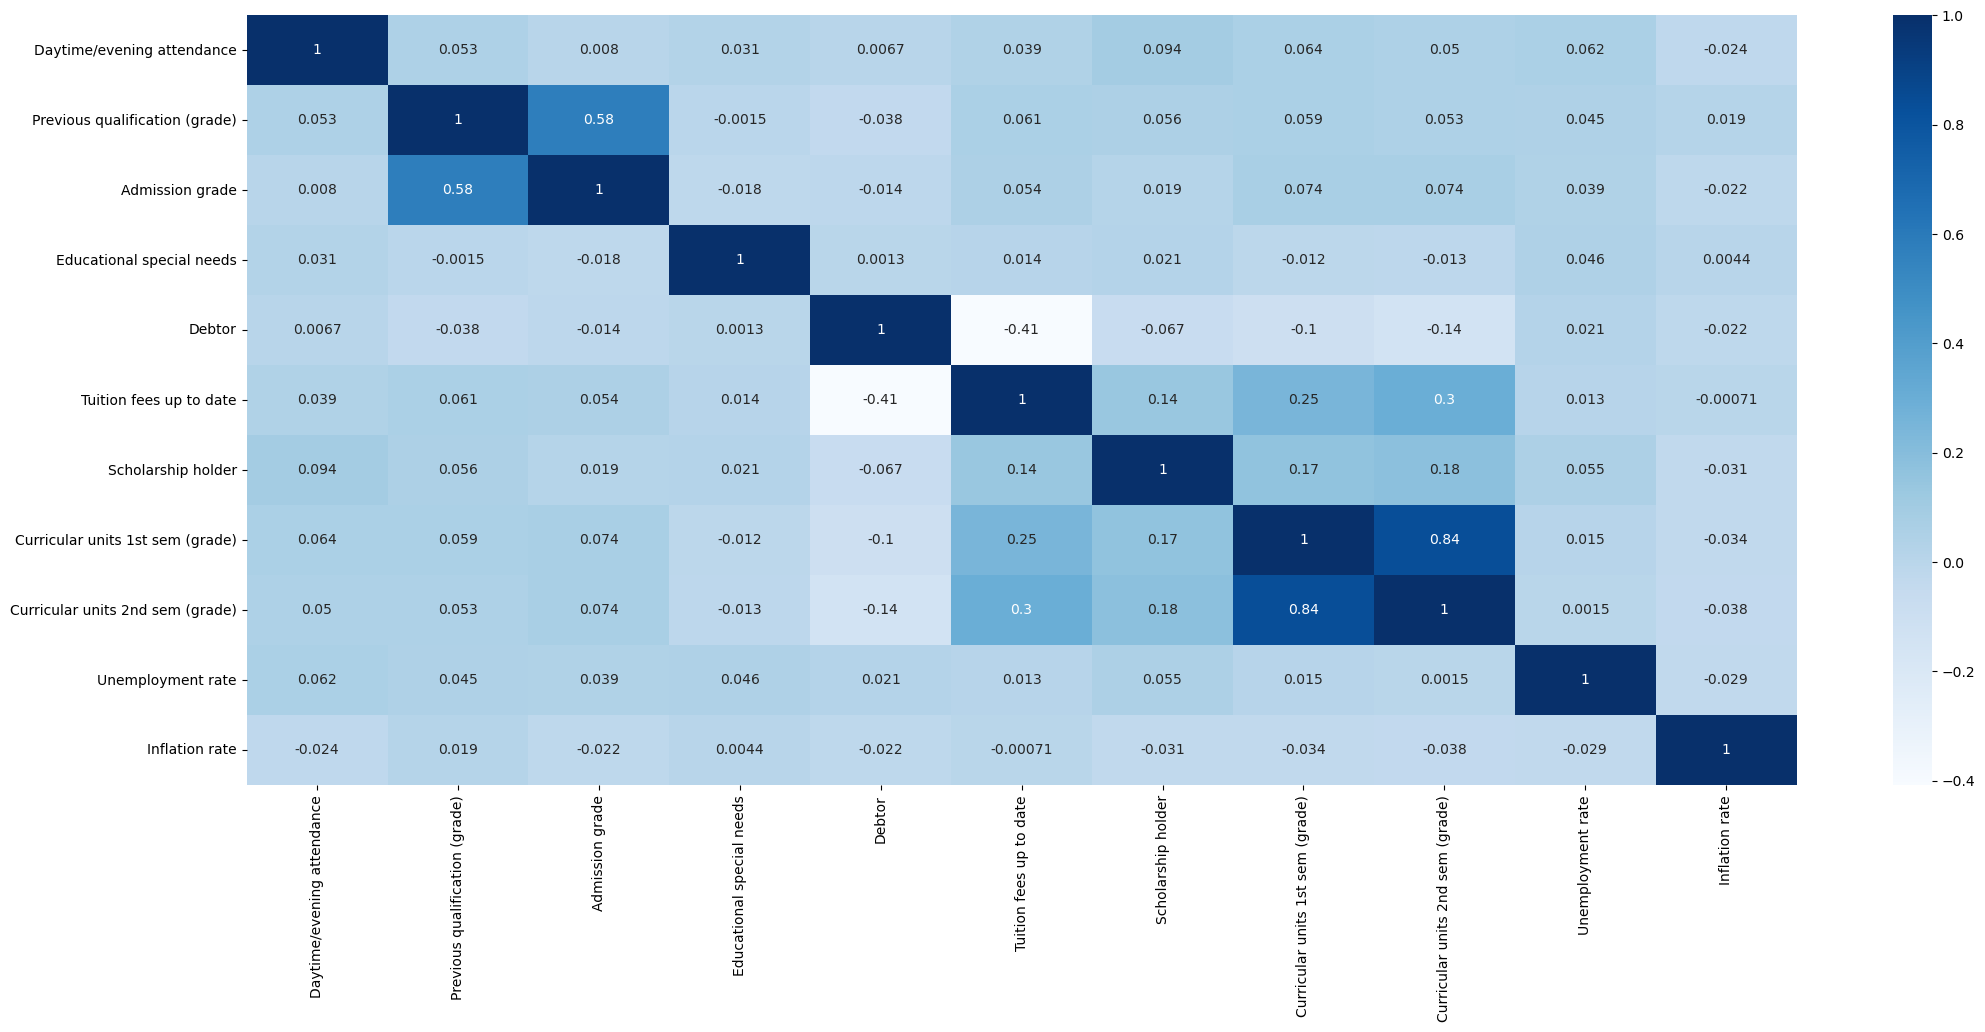

In [43]:
plt.figure(figsize=(25,10))
cor = a_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [44]:
# Applying the lambda function to the 'target' column to convert 'Yes' to 1 and 'No' to 0
a_df['Target'] = a_df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# Print the updated DataFrame
print(a_df.head())

  Marital status  Daytime/evening attendance  Previous qualification (grade)  \
0         single                           1                           122.0   
1         single                           1                           160.0   
2         single                           1                           122.0   
3         single                           1                           122.0   
4        married                           0                           100.0   

   Admission grade  Educational special needs  Debtor  \
0            127.3                          0       0   
1            142.5                          0       0   
2            124.8                          0       0   
3            119.6                          0       0   
4            141.5                          0       0   

   Tuition fees up to date  Gender  Scholarship holder Age at enrollment  ...  \
0                        1    male                   0             Adult  ...   
1             

In [45]:
#pip install category_encoders
from category_encoders import TargetEncoder

# Initialize the TargetEncoder
target_enc = TargetEncoder()

# Fit and transform the 'Course_category' column using the 'Target' column as the target variable
a_df['Encoded_Course_category'] = target_enc.fit_transform(X=a_df['Course_category'], y=a_df['Target'])
a_df["Encoded_Mother's occupation_category"] = target_enc.fit_transform(X=a_df["Mother's occupation_category"], y=a_df['Target'])
a_df["Encoded_Father's occupation_category"] = target_enc.fit_transform(X=a_df["Father's occupation_category"], y=a_df['Target'])

# Display the DataFrame
a_df.head()

,Marital status,Daytime/evening attendance,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Target,Mother's qualification Category,Father's qualification Category,Previous qualification Category,Mother's occupation_category,Father's occupation_category,Course_category,Encoded_Course_category,Encoded_Mother's occupation_category,Encoded_Father's occupation_category
0,single,1,122.0,127.3,0,0,1,male,0,Adult,...,1,Secondary Education,Secondary Education,Secondary Education,Skilled Workers,Unskilled Workers,Design and Multimedia,0.303109,0.295430,0.312321
1,single,1,160.0,142.5,0,0,0,male,0,Adult,...,0,Secondary Education,Graduate,Secondary Education,Technical and Intermediate Level Professions,Intellectual and Scientific Professions,Tourism and Hospitality,0.380952,0.267409,0.312925
2,single,1,122.0,124.8,0,0,0,male,0,Adult,...,1,Secondary Education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,Design and Multimedia,0.303109,0.302769,0.312321
3,single,1,122.0,119.6,0,0,1,female,0,Adult,...,0,Secondary Education,Secondary Education,Secondary Education,Skilled Workers,Intellectual and Scientific Professions,Design and Multimedia,0.303109,0.295430,0.312925
4,married,0,100.0,141.5,0,0,1,female,0,Adult,...,0,Secondary Education,Secondary Education,Secondary Education,Unskilled Workers,Unskilled Workers,Social Service,0.238596,0.302769,0.312321


In [46]:
# Select the columns to one-hot encode
columns_to_encode = ['Gender', 'Marital status', "Mother's qualification Category",
                     "Father's qualification Category", 'Previous qualification Category', 'Age at enrollment']

categorical_columns = a_df.select_dtypes(include=['object']).columns.tolist()
#a_df_encoded = pd.get_dummies(a_df, columns=columns_to_encode)
#a_df_encoded.head()

# One-hot encoding the categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(a_df[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded columns with the original DataFrame 'a_df'
a_df_encoded = pd.concat([a_df, categorical_encoded], axis=1)

# Display the result
a_df_encoded.head()

,Marital status,Daytime/evening attendance,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Father's qualification Category_Masters,Father's qualification Category_Other,Father's qualification Category_Secondary Education,Previous qualification Category_Graduate,Previous qualification Category_Masters,Previous qualification Category_Other,Previous qualification Category_Secondary Education,Age at enrollment_Adult,Age at enrollment_Child,Age at enrollment_Senior
0,single,1,122.0,127.3,0,0,1,male,0,Adult,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,single,1,160.0,142.5,0,0,0,male,0,Adult,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,single,1,122.0,124.8,0,0,0,male,0,Adult,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,single,1,122.0,119.6,0,0,1,female,0,Adult,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,married,0,100.0,141.5,0,0,1,female,0,Adult,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [47]:
#Drop unwanted columns:
a_df_encoded = a_df_encoded.drop(columns=['Gender', 'Marital status', "Mother's qualification Category","Father's qualification Category", 'Previous qualification Category',
                                         "Mother's occupation_category", "Father's occupation_category", 'Course_category','Age at enrollment'])
a_df_encoded.head()

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,...,Father's qualification Category_Masters,Father's qualification Category_Other,Father's qualification Category_Secondary Education,Previous qualification Category_Graduate,Previous qualification Category_Masters,Previous qualification Category_Other,Previous qualification Category_Secondary Education,Age at enrollment_Adult,Age at enrollment_Child,Age at enrollment_Senior
0,1,122.0,127.3,0,0,1,0,0.000000,0.000000,10.8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,160.0,142.5,0,0,0,0,14.000000,13.666667,13.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,122.0,124.8,0,0,0,0,0.000000,0.000000,10.8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,122.0,119.6,0,0,1,0,13.428571,12.400000,9.4,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,100.0,141.5,0,0,1,0,12.333333,13.000000,13.9,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Decision Tree Model 

In [48]:
# let's create separate indep. X variables from dep. Y variable
X = a_df_encoded.drop('Target', axis = 1).copy()
y = a_df_encoded['Target'].copy()

In [49]:
# Checking if the data is imbalanced or not
sum(y)/ len(y)
# 32% of the students have dropped out. We need to make sure that we maintain the same % across both training and testing datasets
# this kind of splitting the data maintaining the ratio is called "stratification"

0.3212025316455696

train ratio = 0.3212771969482905
test ratio = 0.32090395480225986


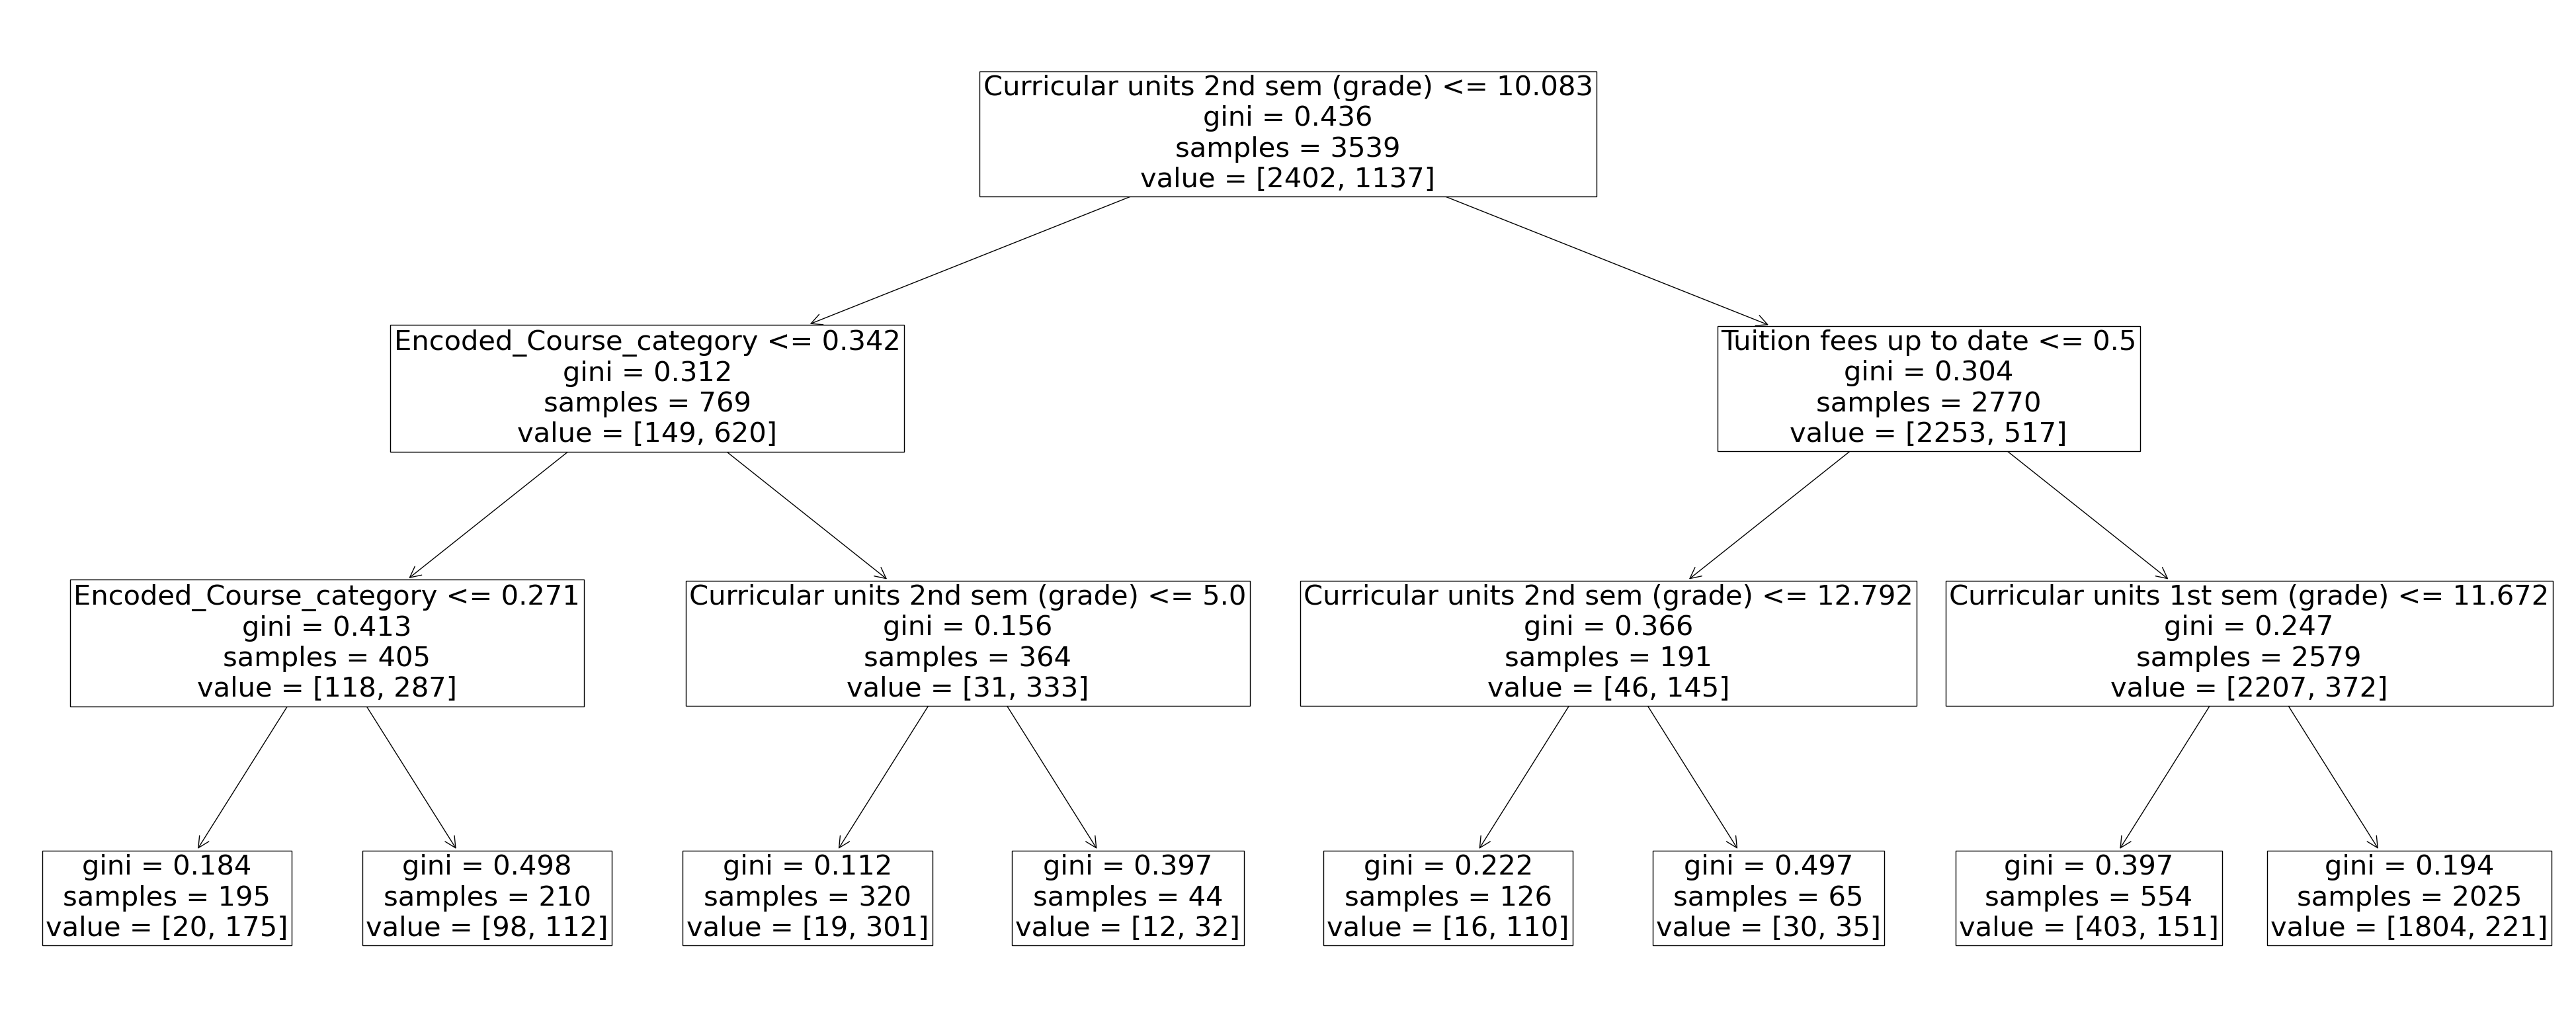

In [50]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("train ratio =", sum(y_train)/ len(y_train))
print("test ratio =", sum(y_test)/ len(y_test))

# Creating and fitting the decision tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decision_tree.fit(X_train, y_train)

# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
#tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
tree.plot_tree(decision_tree, feature_names=X_train.columns, fontsize=30)

# Predicting on the test set
y_pred = decision_tree.predict(X_test)


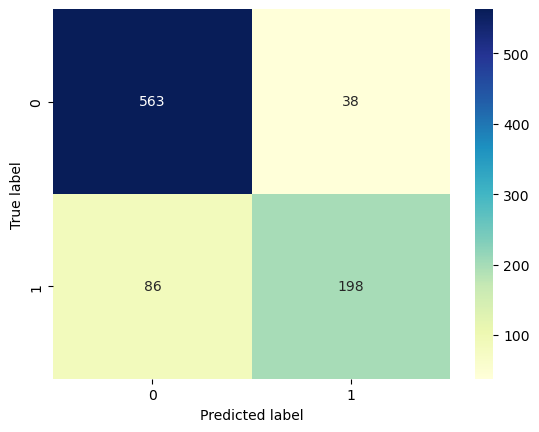

In [51]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [52]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.8598870056497175


In [53]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       601
           1       0.84      0.70      0.76       284

    accuracy                           0.86       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.86      0.86      0.86       885



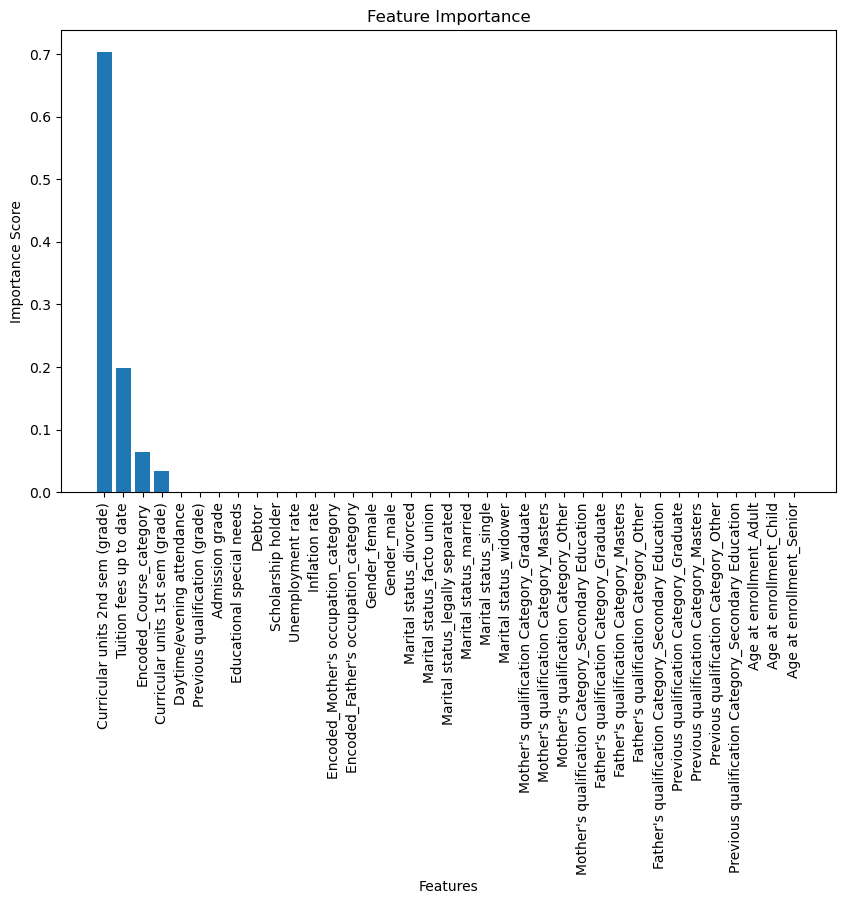

In [54]:
importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

## Random Forest Model 

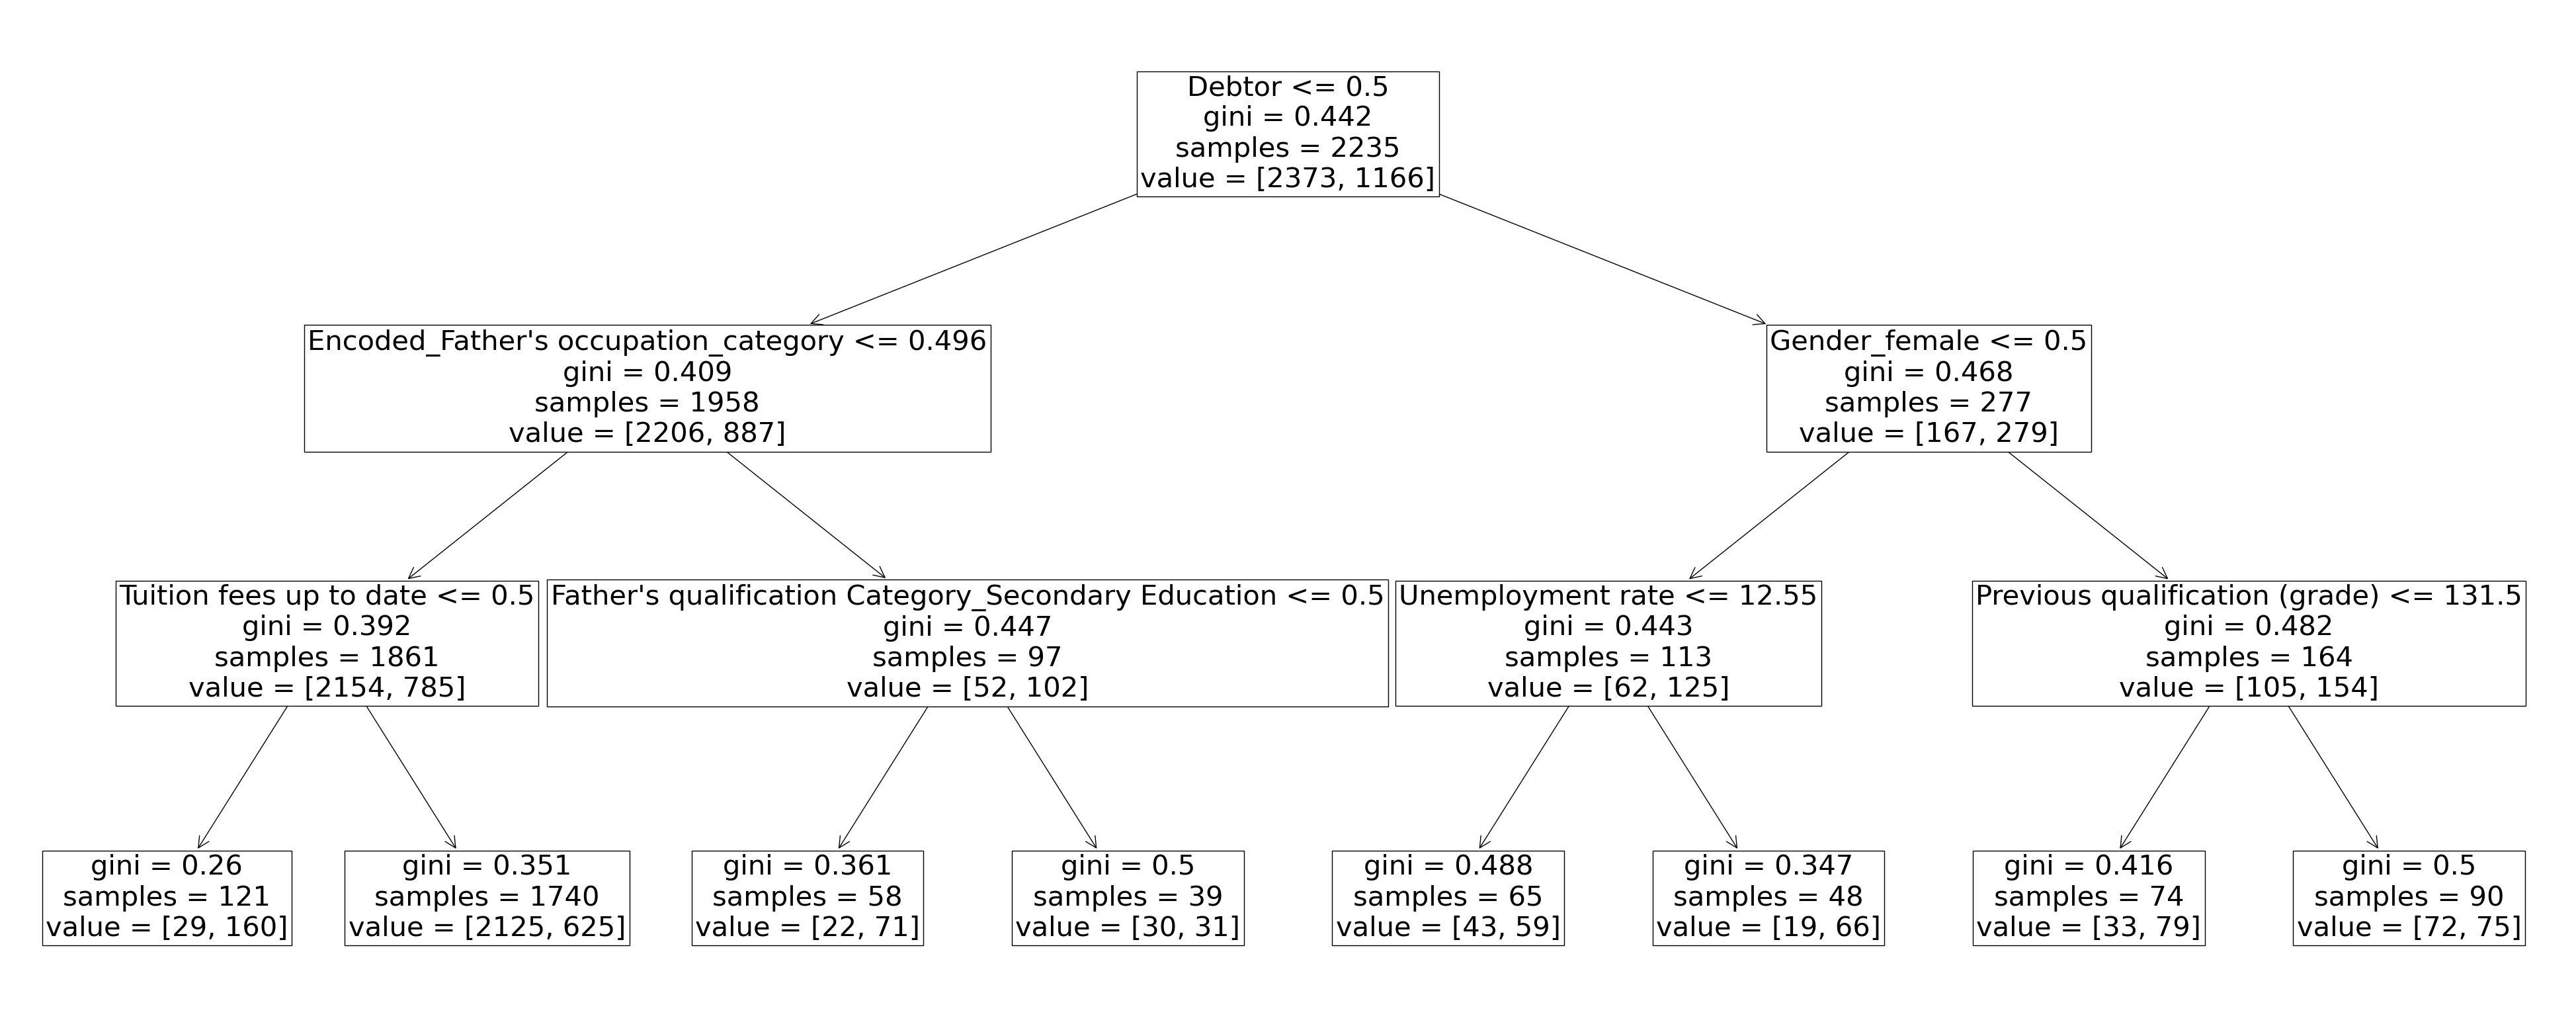

In [55]:
# Creating and fitting the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=3, random_state=0)
random_forest.fit(X_train, y_train)

# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = random_forest.estimators_[0]
# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
#plot_tree(tree_to_plot, feature_names=X_train.columns,class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
tree.plot_tree(tree_to_plot, feature_names=X_train.columns, fontsize=30)
plt.show()

# Predicting on the test set
y_pred = random_forest.predict(X_test)

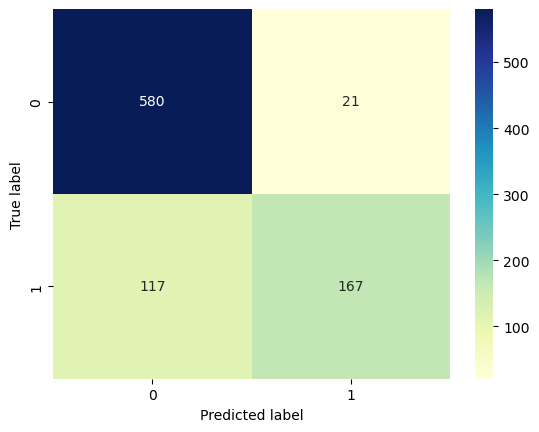

In [56]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [57]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.8440677966101695


In [58]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       601
           1       0.89      0.59      0.71       284

    accuracy                           0.84       885
   macro avg       0.86      0.78      0.80       885
weighted avg       0.85      0.84      0.83       885



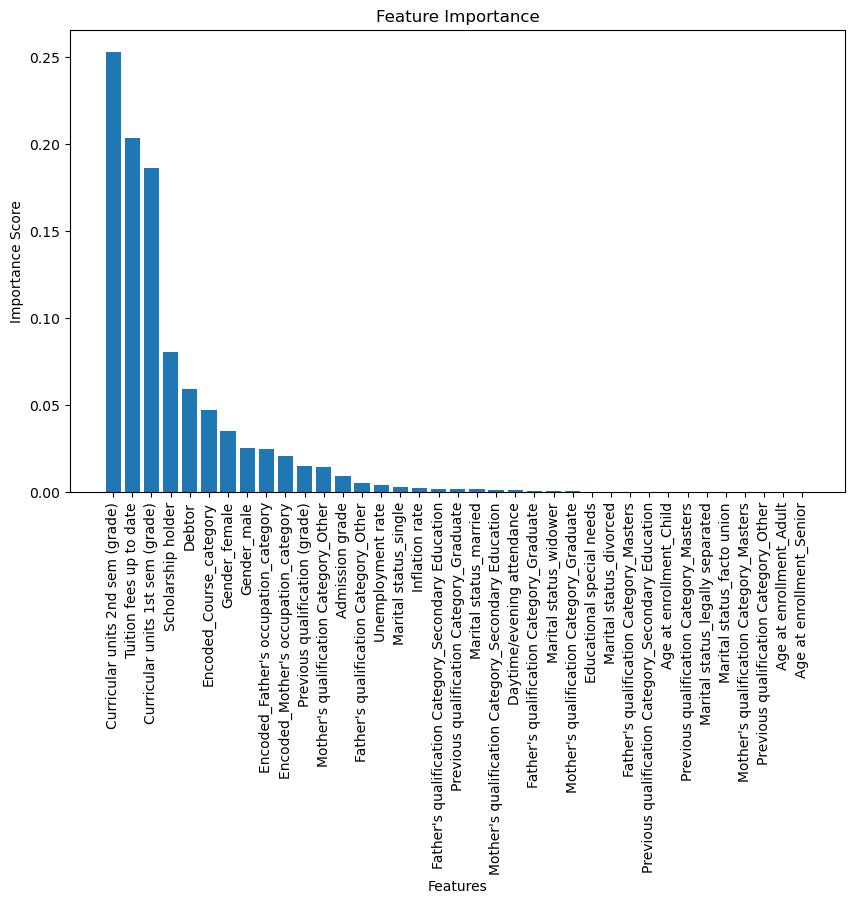

In [59]:
importances = random_forest.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

## Gradient Boost Model 

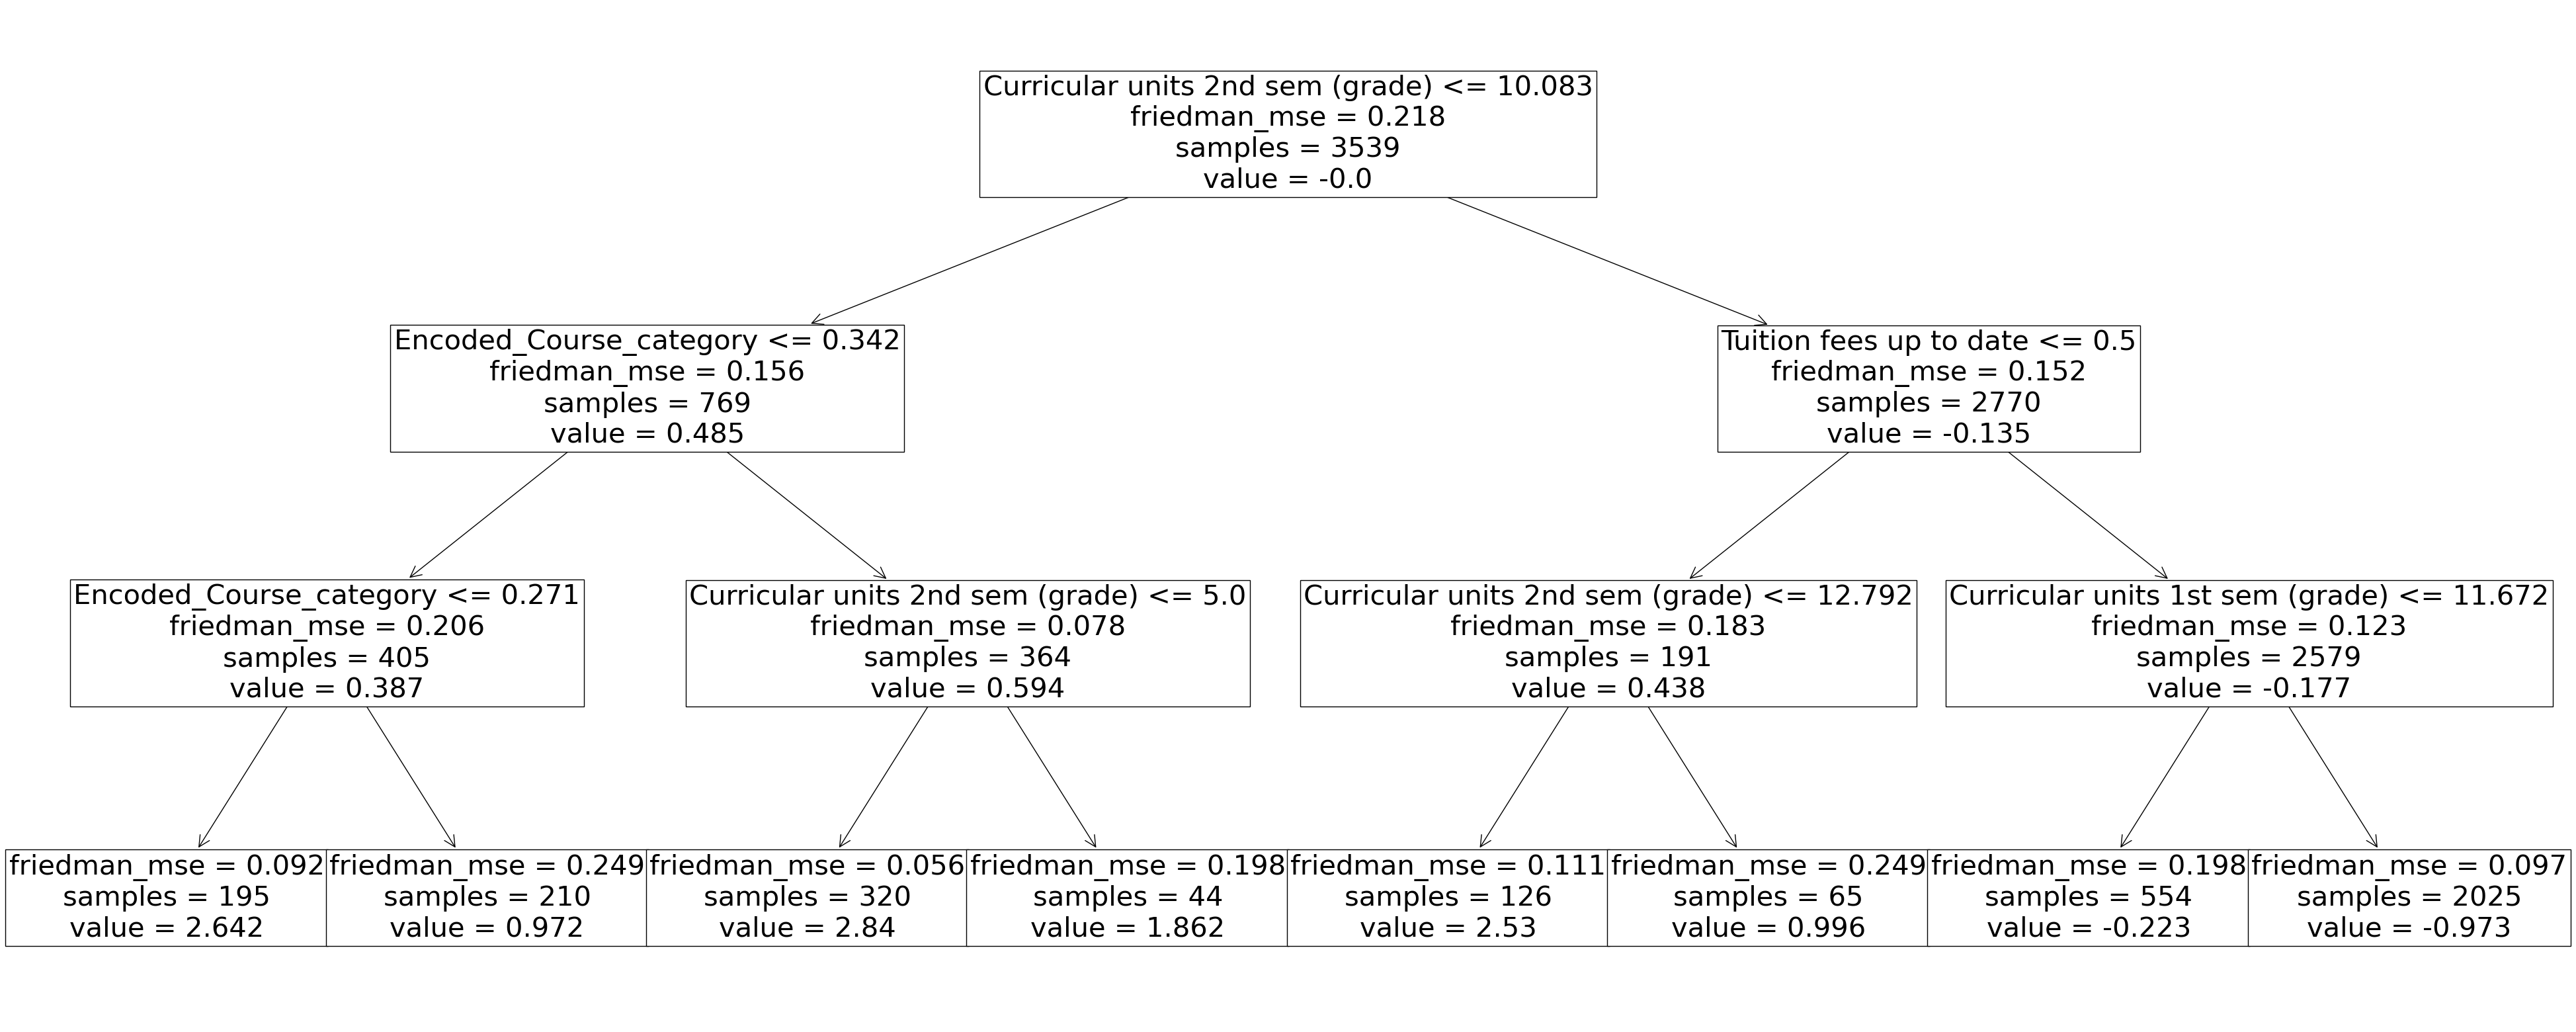

In [60]:
# Creating and fitting the Gradient Boosting model
gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)
gradient_boost.fit(X_train, y_train)

# Choose a tree from the forest to plot (e.g., the first tree)
tree_to_plot = gradient_boost.estimators_[0][0]  # Select the first tree

# Get the unique target class values
class_values = y.unique()

plt.figure(figsize=(50, 20))
plot_tree(tree_to_plot, feature_names=X_train.columns, class_names=[f'{class_value} ({y_train.value_counts()[class_value]})' for class_value in class_values], fontsize=30)
plt.show()

# Predicting on the test set
y_pred = gradient_boost.predict(X_test)


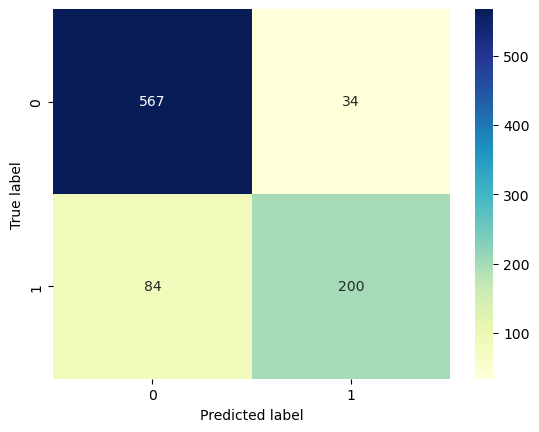

In [61]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [62]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.8666666666666667


In [63]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       601
           1       0.85      0.70      0.77       284

    accuracy                           0.87       885
   macro avg       0.86      0.82      0.84       885
weighted avg       0.87      0.87      0.86       885



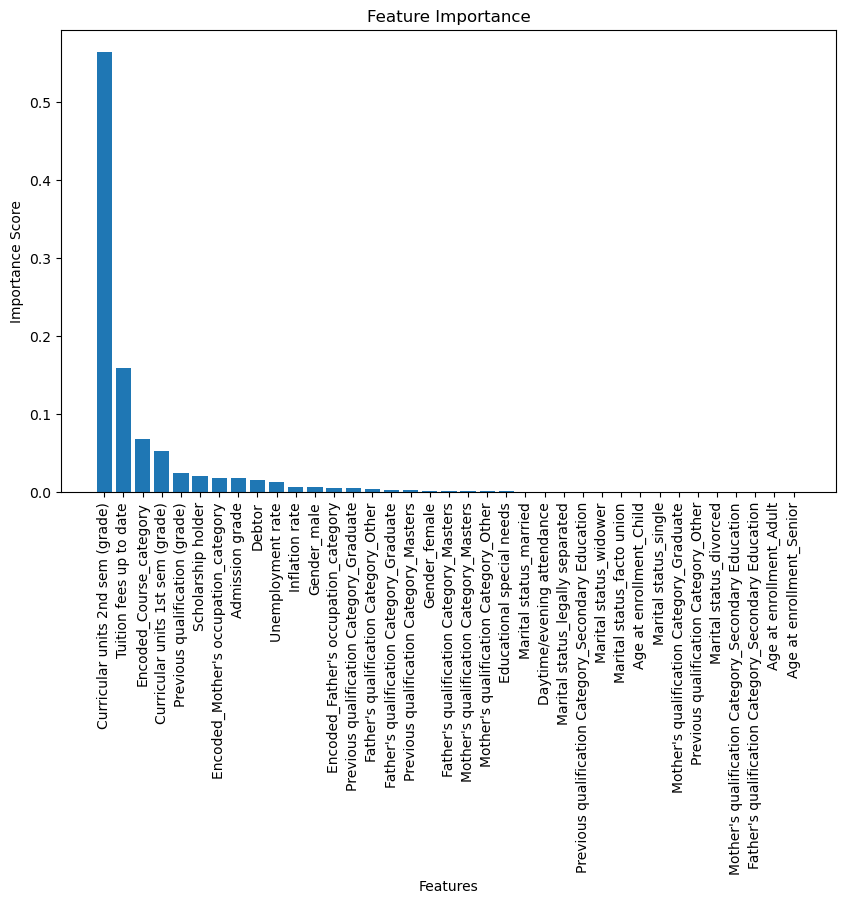

In [64]:
importances = gradient_boost.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

## Gradient Boosting Machine - XgBoost 

In [65]:
#pip install graphviz
#pip install python-graphviz

import xgboost as xgb
import matplotlib.pyplot as plt

# Drop rows with missing values from the training set
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Drop rows with missing values from the test set
X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Creating the XGBClassifier shell
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Adding the data and fitting the model with early stopping
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

# Assuming you have already fitted the xgboost_model
y_pred = clf_xgb.predict(X_test)


[0]	validation_0-aucpr:0.80371
[1]	validation_0-aucpr:0.82043
[2]	validation_0-aucpr:0.81961
[3]	validation_0-aucpr:0.82382
[4]	validation_0-aucpr:0.83064
[5]	validation_0-aucpr:0.83298
[6]	validation_0-aucpr:0.84845
[7]	validation_0-aucpr:0.84566
[8]	validation_0-aucpr:0.84572
[9]	validation_0-aucpr:0.84637
[10]	validation_0-aucpr:0.85012
[11]	validation_0-aucpr:0.84954
[12]	validation_0-aucpr:0.85099
[13]	validation_0-aucpr:0.85349
[14]	validation_0-aucpr:0.85323
[15]	validation_0-aucpr:0.85240
[16]	validation_0-aucpr:0.85084
[17]	validation_0-aucpr:0.85088
[18]	validation_0-aucpr:0.85027
[19]	validation_0-aucpr:0.85014
[20]	validation_0-aucpr:0.84894
[21]	validation_0-aucpr:0.84787
[22]	validation_0-aucpr:0.84905


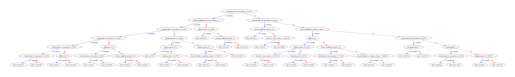

In [66]:
xgb.plot_tree(clf_xgb,num_trees = 20)
plt.rcParams['figure.figsize'] = [50, 20]
plt.show()

In [67]:
clf_xgb.base_score

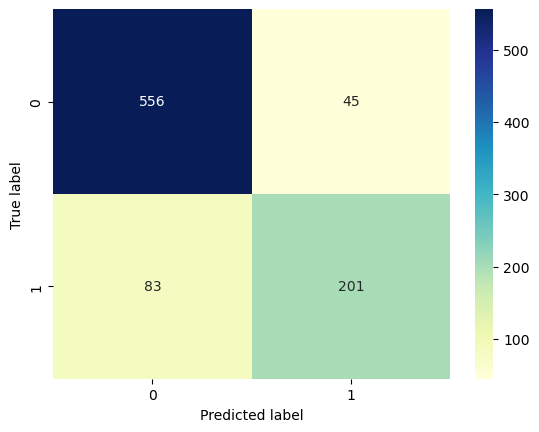

In [68]:
plt.rcParams.update(plt.rcParamsDefault)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [69]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.8553672316384181


In [70]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       601
           1       0.82      0.71      0.76       284

    accuracy                           0.86       885
   macro avg       0.84      0.82      0.83       885
weighted avg       0.85      0.86      0.85       885



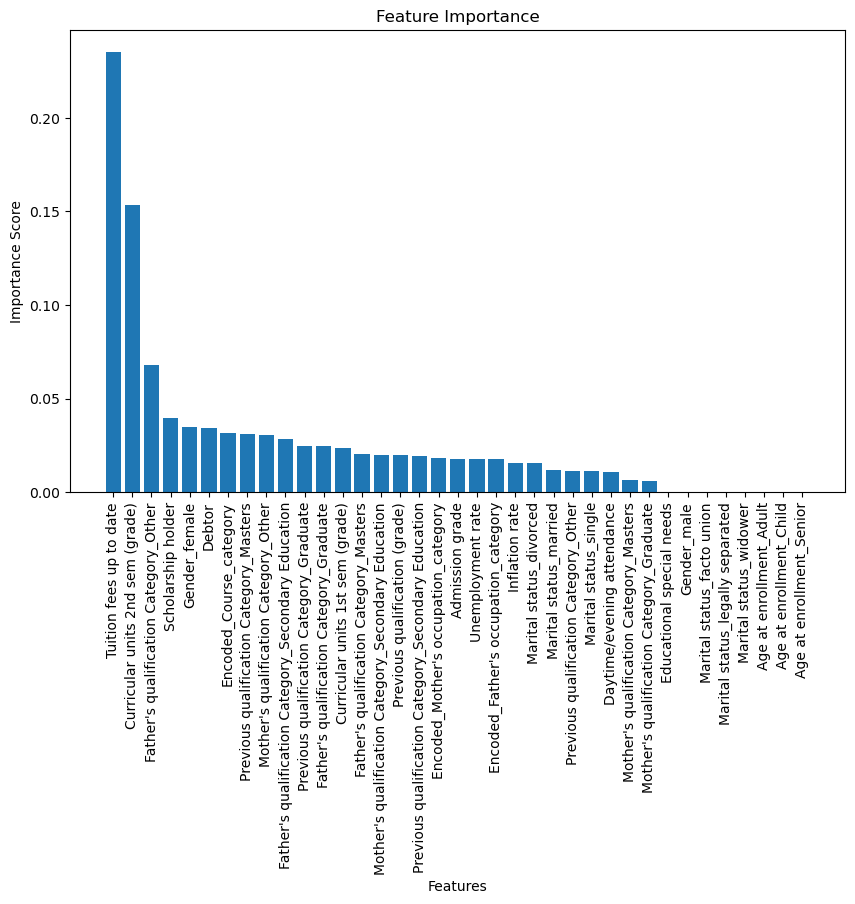

In [71]:
plt.rcParams.update(plt.rcParamsDefault)

importances = clf_xgb.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

## Model Optimization 

In [223]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Drop rows with missing values from the training set
X_train = X_train.dropna()
y_train = y_train[X_train.index]

# Drop rows with missing values from the test set
X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Creating the XGBClassifier shell
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Defining the hyperparameters to tune and their possible values
param_grid = {
    'max_depth': [3, 5, 7],               # Maximum depth of a tree
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage used to prevent overfitting
    'n_estimators': [100, 200, 300]       # Number of boosting rounds
}

# Creating the grid search object with the XGBoost classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=clf_xgb, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fitting the grid search object to the data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fitting the model with the best hyperparameters
clf_xgb_best = xgb.XGBClassifier(objective='binary:logistic', seed=42, **best_params)
clf_xgb_best.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric='aucpr', eval_set=[(X_test, y_test)])


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
[0]	validation_0-aucpr:0.80157
[1]	validation_0-aucpr:0.81966
[2]	validation_0-aucpr:0.82856
[3]	validation_0-aucpr:0.82647
[4]	validation_0-aucpr:0.82688
[5]	validation_0-aucpr:0.82926
[6]	validation_0-aucpr:0.82928
[7]	validation_0-aucpr:0.83536
[8]	validation_0-aucpr:0.83346
[9]	validation_0-aucpr:0.83853
[10]	validation_0-aucpr:0.83694
[11]	validation_0-aucpr:0.83908
[12]	validation_0-aucpr:0.84392
[13]	validation_0-aucpr:0.84479
[14]	validation_0-aucpr:0.84526
[15]	validation_0-aucpr:0.84757
[16]	validation_0-aucpr:0.84970
[17]	validation_0-aucpr:0.85058
[18]	validation_0-aucpr:0.85228
[19]	validation_0-aucpr:0.85250
[20]	validation_0-aucpr:0.85378
[21]	validation_0-aucpr:0.85346
[22]	validation_0-aucpr:0.85421
[23]	validation_0-aucpr:0.85532
[24]	validation_0-aucpr:0.85654
[25]	validation_0-aucpr:0.85733
[26]	validation_0-aucpr:0.85774
[27]	validation_0-aucpr:0.85750
[28]	validation_0-aucpr:0.85878


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

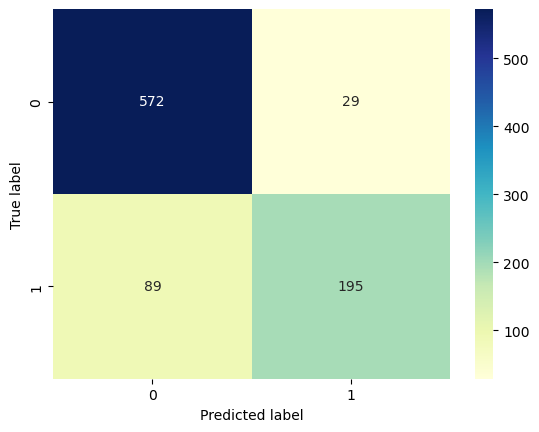

In [224]:
# Assuming you have already fitted the xgboost_model
y_pred = clf_xgb_best.predict(X_test)

# Compute confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [225]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.8666666666666667


In [226]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       601
           1       0.87      0.69      0.77       284

    accuracy                           0.87       885
   macro avg       0.87      0.82      0.84       885
weighted avg       0.87      0.87      0.86       885



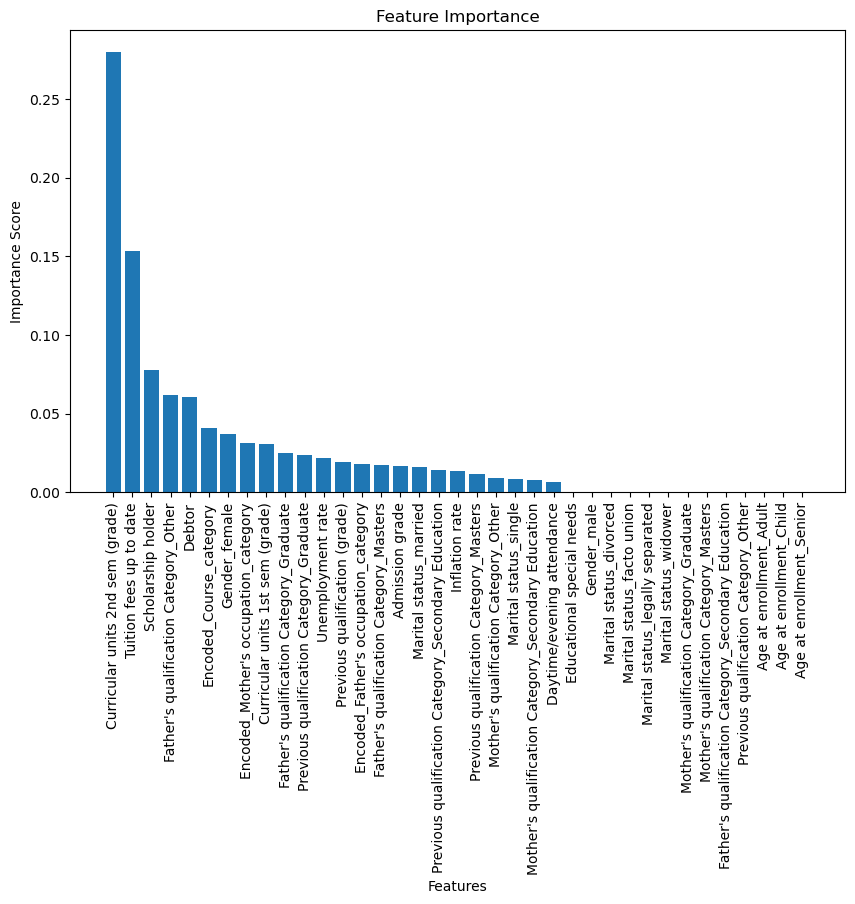

In [227]:
plt.rcParams.update(plt.rcParamsDefault)

importances = clf_xgb_best.feature_importances_
feature_names = X_train.columns

# Create a dictionary to store feature importance scores
feature_importance = dict(zip(feature_names, importances))

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and importance scores
features = [feature for feature, _ in sorted_features]
importances = [importance for _, importance in sorted_features]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')

# Display the plot
plt.show()

## Logistic Regression 

In [228]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the top 10 features
num_features_to_select = 10
rfe = RFE(model, n_features_to_select=num_features_to_select)
rfe.fit(X, y)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Tuition fees up to date', 'Scholarship holder',
       'Encoded_Course_category', 'Encoded_Mother's occupation_category',
       'Encoded_Father's occupation_category', 'Gender_male',
       'Marital status_legally separated',
       'Mother's qualification Category_Other',
       'Previous qualification Category_Graduate', 'Age at enrollment_Child'],
      dtype='object')


In [229]:
# Update the X with the new selected features
X= X[selected_feature_names]

In [230]:
# Checking if the data is imbalanced or not
sum(y)/ len(y)
# 32% of the students have dropped out. We need to make sure that we maintain the same % across both training and testing datasets
# this kind of splitting the data maintaining the ratio is called "stratification"

0.3212025316455696

In [231]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("train ratio =", sum(y_train)/ len(y_train))
print("test ratio =", sum(y_test)/ len(y_test))

train ratio = 0.3212771969482905
test ratio = 0.32090395480225986


In [232]:
# Standardize the feature matrix to avoid scaling issues with regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store the feature names in a separate list or array.
feature_names = list(X.columns)

# Creating and fitting the logistic regression model with L1 regularization (Lasso)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Extract coefficients and Exponential Coefficient
coefficients = log_reg.coef_[0]
exp_coefficients = np.exp(coefficients)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Exponential_Coefficient': exp_coefficients})

# Print the result
print(result_df)

# Predicting on the test set
y_pred = log_reg.predict(X_test_scaled)

                                    Feature  Coefficient  \
0                   Tuition fees up to date    -0.907047   
1                        Scholarship holder    -0.457809   
2                   Encoded_Course_category     0.334468   
3      Encoded_Mother's occupation_category     0.282417   
4      Encoded_Father's occupation_category     0.063203   
5                               Gender_male     0.251678   
6          Marital status_legally separated     0.082618   
7     Mother's qualification Category_Other     0.092034   
8  Previous qualification Category_Graduate     0.146597   
9                   Age at enrollment_Child    -0.127987   

   Exponential_Coefficient  
0                 0.403715  
1                 0.632668  
2                 1.397196  
3                 1.326331  
4                 1.065243  
5                 1.286182  
6                 1.086127  
7                 1.096402  
8                 1.157887  
9                 0.879865  


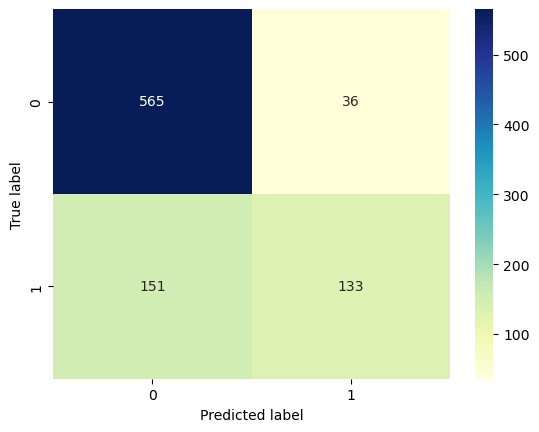

In [233]:
plt.rcParams.update(plt.rcParamsDefault)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [234]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.7887005649717514


In [235]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       601
           1       0.79      0.47      0.59       284

    accuracy                           0.79       885
   macro avg       0.79      0.70      0.72       885
weighted avg       0.79      0.79      0.77       885



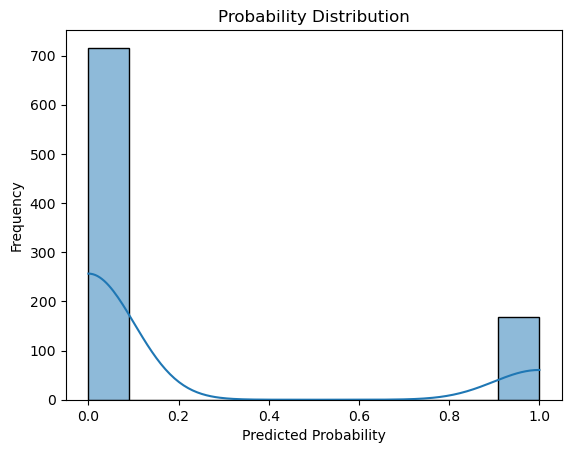

In [236]:
plt.rcParams.update(plt.rcParamsDefault)

# Plot the probability distribution of predicted probabilities
sns.histplot(y_pred, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.show()

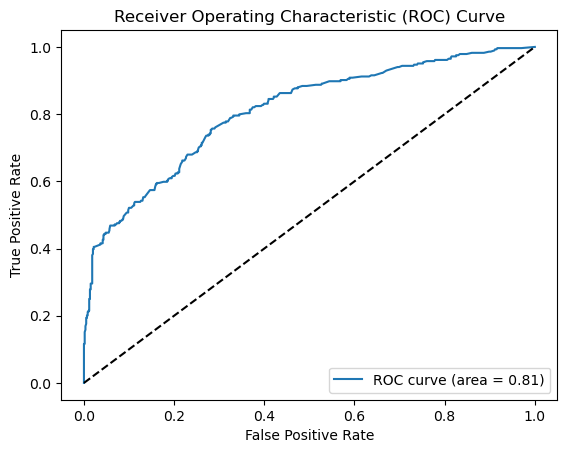

In [237]:
plt.rcParams.update(plt.rcParamsDefault)

y_pred_proba = log_reg.predict_proba(X_test_scaled)[::,1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, roc_auc_score, average_precision_score
import numpy as np
plt.rcParams.update(plt.rcParamsDefault)

# Assuming you have already trained your logistic regression model and obtained predicted probabilities on the test set as y_probs

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Calculate Gini coefficient (Lorentz curve)
lorentz_curve = np.cumsum(np.sort(y_test)[::-1]) / np.sum(y_test)
gini_coefficient = 2 * auc(np.linspace(0, 1, len(lorentz_curve)), lorentz_curve) - 1

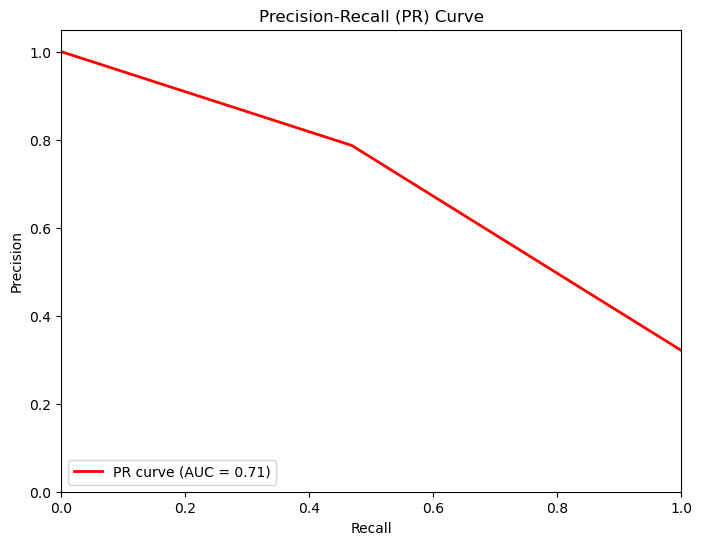

In [239]:
# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.show()


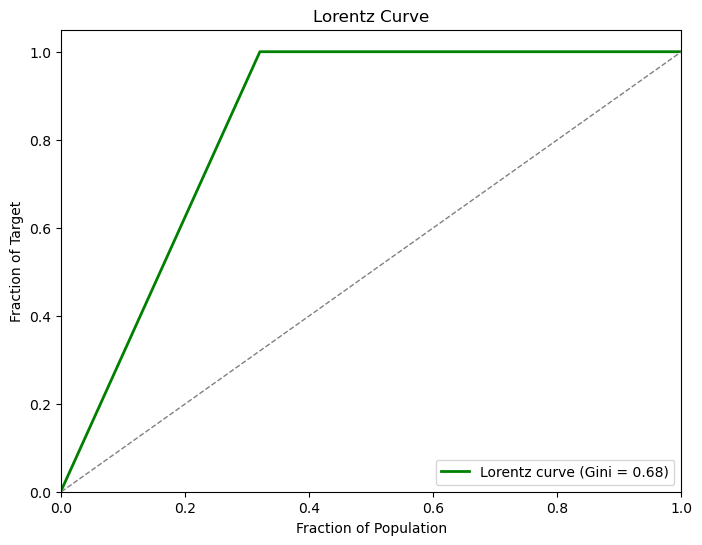

In [240]:
# Plot Lorentz curve
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(lorentz_curve)), lorentz_curve, color='green', lw=2, label='Lorentz curve (Gini = %0.2f)' % gini_coefficient)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Fraction of Population')
plt.ylabel('Fraction of Target')
plt.title('Lorentz Curve')
plt.legend(loc='lower right')
plt.show()

## Ridge Regularization

In [241]:
# Standardize the feature matrix to avoid scaling issues with regularization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store the feature names in a separate list or array.
feature_names = list(X.columns)

# Creating and fitting the logistic regression model with L1 regularization (Lasso)
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Extract coefficients and Exponential Coefficient
coefficients = log_reg.coef_[0]
exp_coefficients = np.exp(coefficients)

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Exponential_Coefficient': exp_coefficients})

# Print the result
print(result_df)

# Predicting on the test set
y_pred = log_reg.predict(X_test_scaled)

                                    Feature  Coefficient  \
0                   Tuition fees up to date    -0.907407   
1                        Scholarship holder    -0.458880   
2                   Encoded_Course_category     0.335447   
3      Encoded_Mother's occupation_category     0.282437   
4      Encoded_Father's occupation_category     0.064201   
5                               Gender_male     0.252865   
6          Marital status_legally separated     0.084375   
7     Mother's qualification Category_Other     0.093163   
8  Previous qualification Category_Graduate     0.147886   
9                   Age at enrollment_Child    -0.186060   

   Exponential_Coefficient  
0                 0.403569  
1                 0.631991  
2                 1.398565  
3                 1.326358  
4                 1.066307  
5                 1.287710  
6                 1.088036  
7                 1.097641  
8                 1.159381  
9                 0.830224  


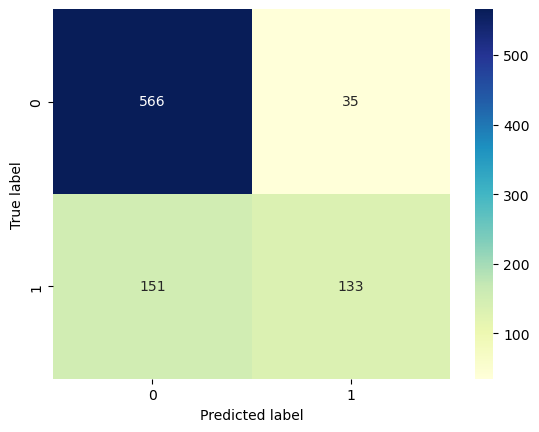

In [242]:
plt.rcParams.update(plt.rcParamsDefault)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [243]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.7898305084745763


In [244]:
# Generating the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       601
           1       0.79      0.47      0.59       284

    accuracy                           0.79       885
   macro avg       0.79      0.71      0.72       885
weighted avg       0.79      0.79      0.77       885



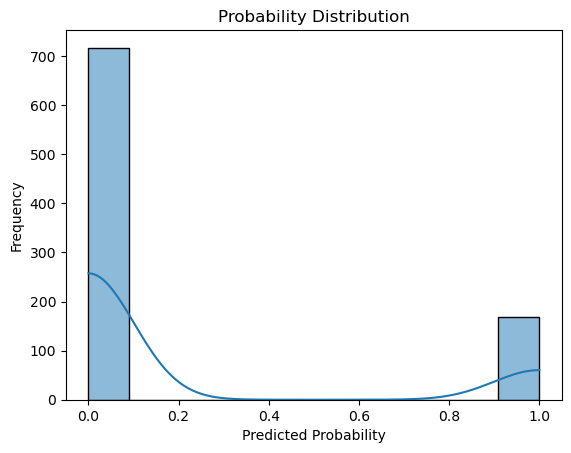

In [245]:
# Plot the probability distribution of predicted probabilities
sns.histplot(y_pred, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.show()

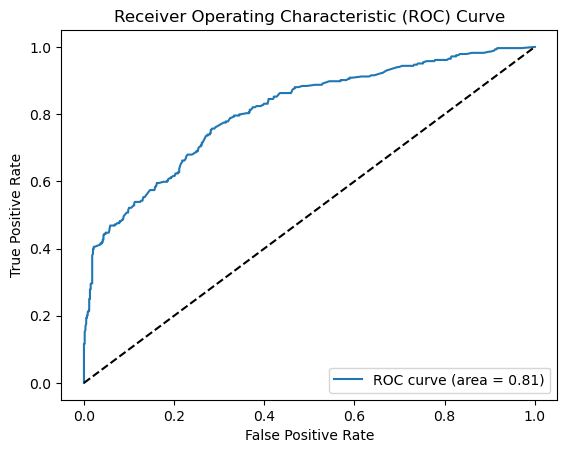

In [246]:
y_pred_proba = log_reg.predict_proba(X_test_scaled)[::,1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [247]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, roc_auc_score, average_precision_score
import numpy as np

# Assuming you have already trained your logistic regression model and obtained predicted probabilities on the test set as y_probs

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Calculate Gini coefficient (Lorentz curve)
lorentz_curve = np.cumsum(np.sort(y_test)[::-1]) / np.sum(y_test)
gini_coefficient = 2 * auc(np.linspace(0, 1, len(lorentz_curve)), lorentz_curve) - 1

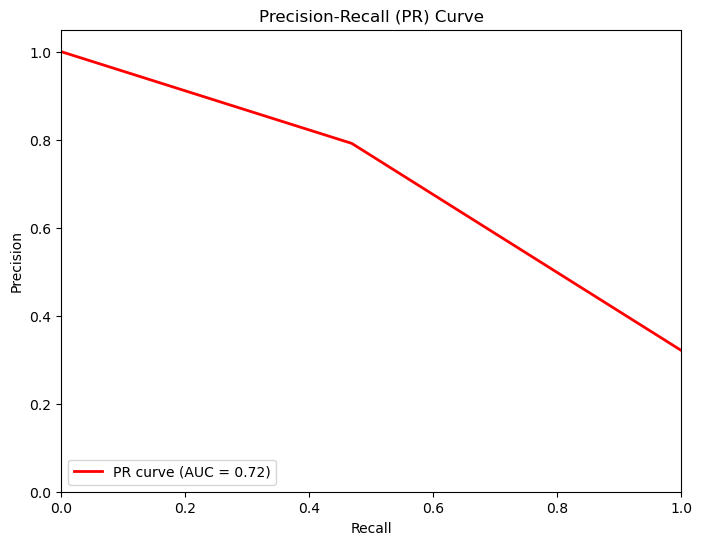

In [248]:
# Plot PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')
plt.show()

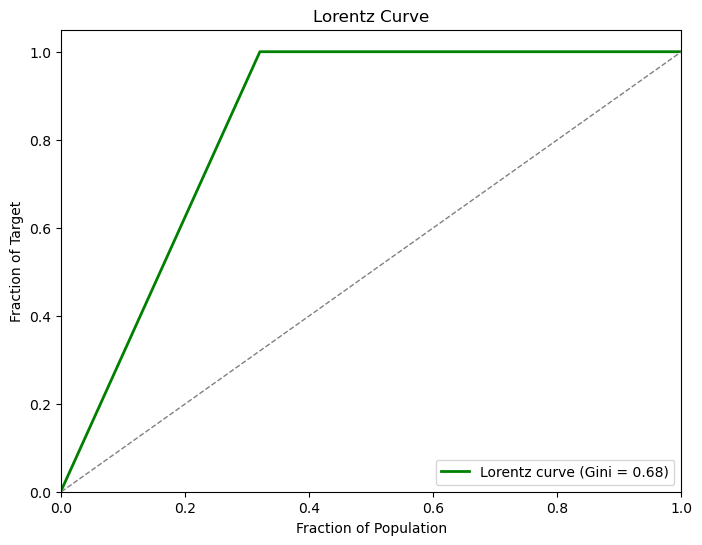

In [249]:
# Plot Lorentz curve
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, len(lorentz_curve)), lorentz_curve, color='green', lw=2, label='Lorentz curve (Gini = %0.2f)' % gini_coefficient)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Fraction of Population')
plt.ylabel('Fraction of Target')
plt.title('Lorentz Curve')
plt.legend(loc='lower right')
plt.show()

## SVM 

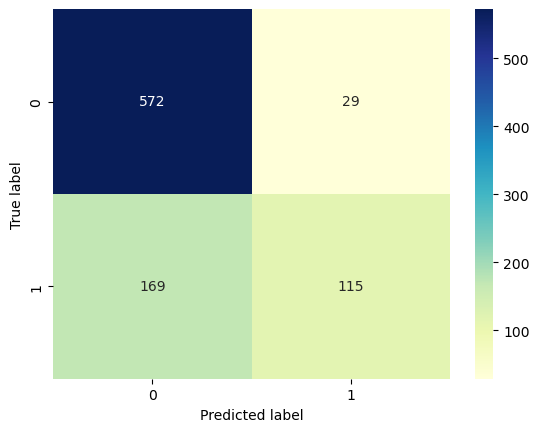

In [250]:
# Creating and fitting the SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear',probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

[[-6.42742791e-01 -5.74530637e-05  4.25119364e-06  3.02343147e-04
   3.72121983e-05  1.89105015e-05  6.72026021e-02  3.58783438e-01
   1.72460564e-05 -2.30340074e-05]]
Index(['Tuition fees up to date', 'Scholarship holder',
       'Encoded_Course_category', 'Encoded_Mother's occupation_category',
       'Encoded_Father's occupation_category', 'Gender_male',
       'Marital status_legally separated',
       'Mother's qualification Category_Other',
       'Previous qualification Category_Graduate', 'Age at enrollment_Child'],
      dtype='object')


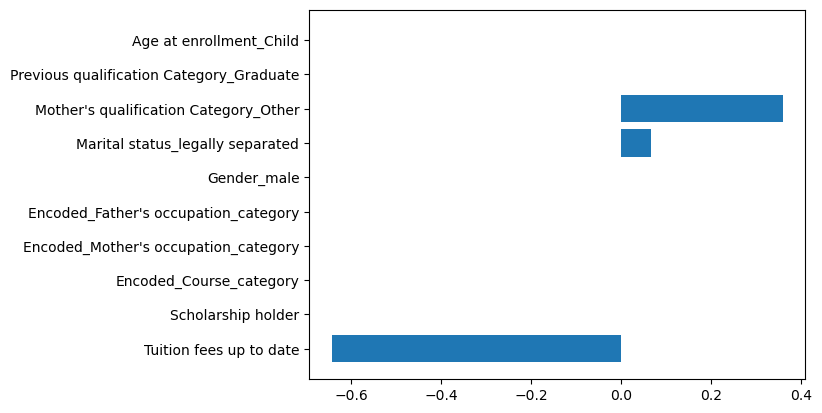

In [251]:
# Printing the SVM coefficients and feature names
print(svm_model.coef_)
print(X.columns)

# Plotting the SVM coefficients
plt.barh(X.columns, svm_model.coef_[0])
plt.show()

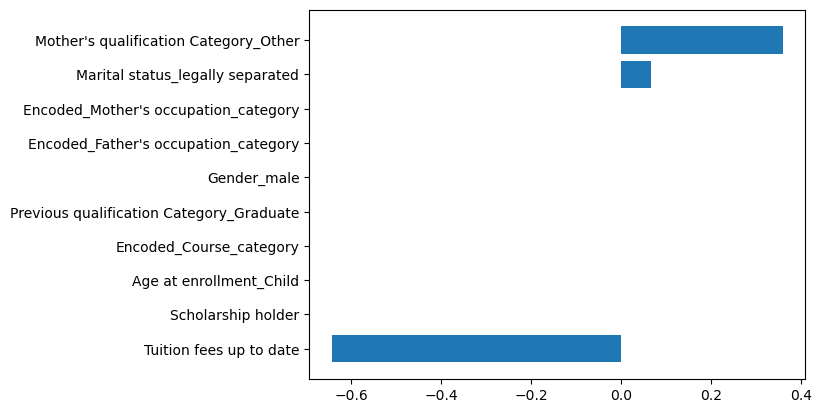

In [252]:
def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

# Plotting the feature importances
f_importances(svm_model.coef_[0], X.columns)

In [253]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.7762711864406779


In [254]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       601
           1       0.80      0.40      0.54       284

    accuracy                           0.78       885
   macro avg       0.79      0.68      0.69       885
weighted avg       0.78      0.78      0.75       885



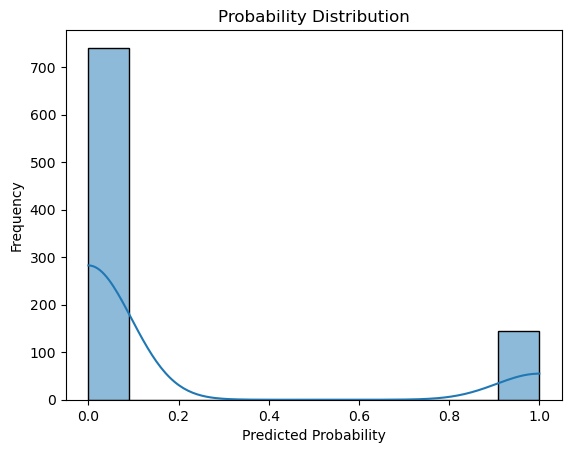

In [255]:
# Plot the probability distribution of predicted probabilities
sns.histplot(y_pred, kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.show()

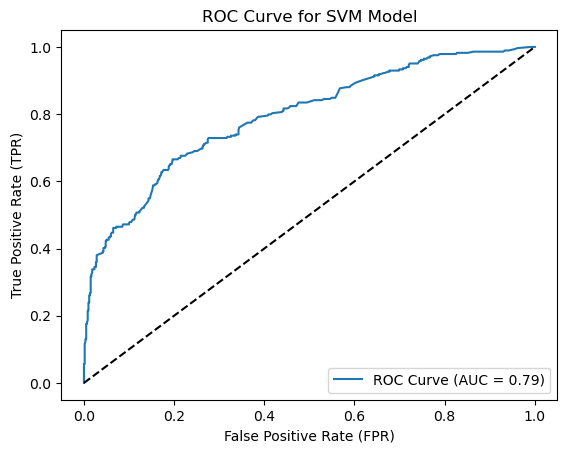

In [256]:

# Predict probabilities for the positive class (class 1)
y_probs = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()


In [257]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 1, 10,]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train_scaled, y_train)

clf.cv_results_

clf.best_params_

{'C': 0.01}

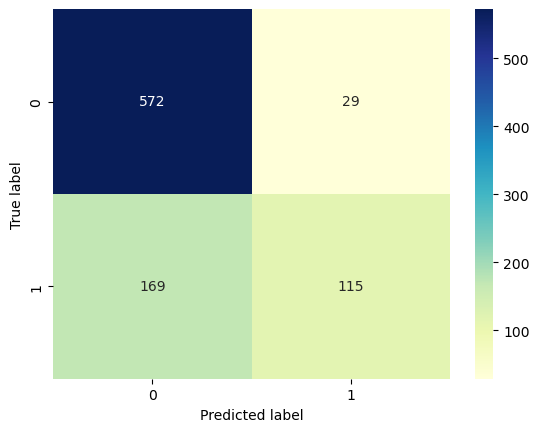

In [258]:
# Creating and fitting the SVM model
svm_model = SVC(C=0.01,kernel='linear',probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = svm_model.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [259]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy of this Model is : ", accuracy)


 Accuracy of this Model is :  0.7762711864406779


In [260]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       601
           1       0.80      0.40      0.54       284

    accuracy                           0.78       885
   macro avg       0.79      0.68      0.69       885
weighted avg       0.78      0.78      0.75       885



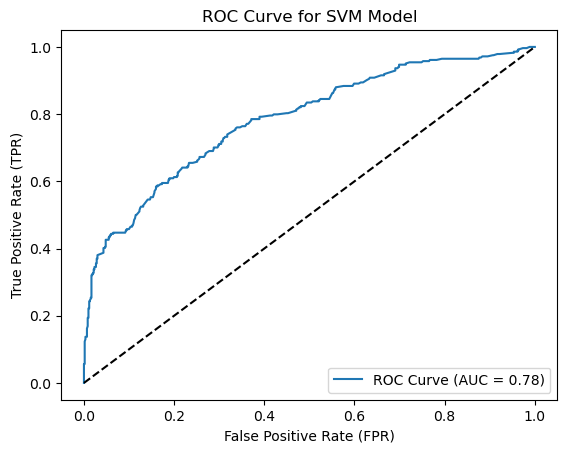

In [261]:

# Predict probabilities for the positive class (class 1)
y_probs = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()
